# Исследовательский анализ данных о безопасности дорог в России (EDA)

### Настройка, загрузка данных и постановка задачи

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from cycler import cycler

In [2]:
font_path = 'Arimo-Regular.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name

In [3]:
fm.FontProperties(fname=font_path).get_name()

'Arimo'

In [4]:
plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    # 'axes.spines.bottom': False,
    'axes.titlesize': 16,
    'axes.titleweight': 'medium',
    'axes.titlelocation': 'left',
    'axes.titlepad': 15,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10, 7.5),
    'axes.grid': False,
    'axes.labelpad': 10,
    'axes.labelcolor': '#ABABAB',
    'axes.prop_cycle': cycler(color=['#45DAD1'])
})

In [5]:
# plt.rcParams

In [6]:
color = '#45DAD1'
padding = 3
bar_label = 12

In [7]:
#bm1

Расшифровка полей:
<li>'reg_code' - код региона 
<li>'рregion_name' - название региона
<li>'road_code' - код дороги
<li>'road_name' -  название дороги
<li>'road_type' - тип дороги
<li>'address' -  Адрес
<li>'crash_type_name' - тип ДТП
<li>'crash_date' - дата ДТП
<li>'crash_time' - время ДТП
<li>'crash_reason' - причина ДТП
<li>'fatalities_amount' - число погибших
<li>'victims_amount' - число пострадавших
<li>'vehicles_amount' - число транспортных средств
<li>'participants_amount' - число участников
<li>'datetime' - дата и время ДТП
<li>'crash_date_day' - день недели
<li>''wait_time' - время ожидания в минутах

<b>Задача</b><br>
Для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети необходимо исследовать и подготовить данные по вопросам:
1. Найти регионы с наибольшей аварийностью.
2. Определить распределение числа ДТП по типам дорог, по видам ДТП.
3. Исследовать зависимость числа ДТП от дня недели.
4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.
5. Исследовать время ожидания сотрудников ДПС.
6. Исследовать число участников ДТП.
7. Исследовать ДТП в ночное время суток.
8. Определить наиболее опасные дороги.




### 1. Регионы с наибольшей аварийностью

In [8]:
data = pd.read_excel('dtp_good.xlsx')

In [9]:
# Общая информация, данные уже обработаны на этапе подготовки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39085 entries, 0 to 39084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   reg_code             39085 non-null  int64         
 1   region_name          39085 non-null  object        
 2   road_code            39085 non-null  object        
 3   road_name            39085 non-null  object        
 4   road_type            39085 non-null  object        
 5   address              39085 non-null  object        
 6   crash_type_name      39085 non-null  object        
 7   crash_date           39085 non-null  int64         
 8   crash_time           39085 non-null  object        
 9   crash_reason         39085 non-null  object        
 10  fatalities_amount    39085 non-null  int64         
 11  victims_amount       39085 non-null  int64         
 12  vehicles_amount      39085 non-null  int64         
 13  participants_amount  39085 non-

In [10]:
# Посмотрим, как выглядят данные
data.head(3)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987


In [11]:
# Всего случаев ДТП
len(data)

39085

In [12]:
# Посмотрим распределение ДТП по регионам
dtp_count = data['region_name'].value_counts().sort_values(ascending=True)
dtp_count

region_name
Республика Ингушетия                 82
Магаданская область                  82
Ямало-Ненецкий автономный округ      86
Томская область                      89
Севастополь                          90
                                   ... 
Ставропольский край                 956
Республика Башкортостан            1075
Ленинградская область              1425
Краснодарский край                 2294
Московская область                 2764
Name: count, Length: 83, dtype: int64

In [13]:
def get_value(ax, pos):
    return int(ax.get_xticklabels()[pos].get_text())

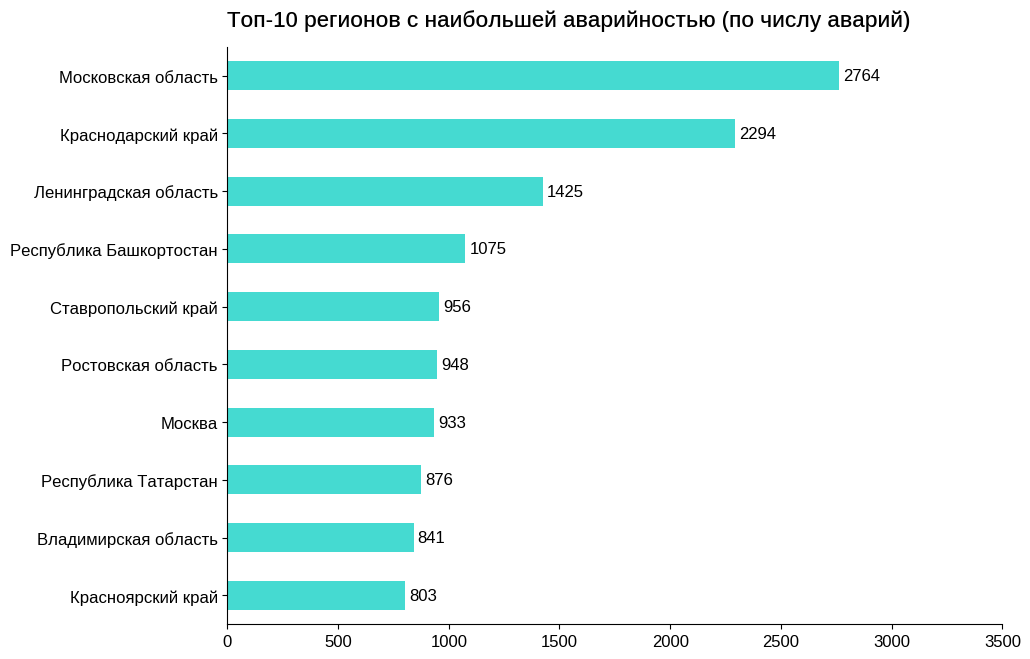

In [14]:
# Визуализируем данные
ax = dtp_count.tail(10).plot(kind='barh',
                             figsize=(10, 7.5),
                             legend=False,
                             zorder=2,
                             color='#45DAD1'
                            )

ax.set_xlim(0, get_value(ax, -1) + get_value(ax, 1))

plt.bar_label(ax.containers[0], padding=padding, fontsize=12)
plt.ylabel(None,  fontdict={'size': '14', 'weight': 'normal'})
plt.title(label='Топ-10 регионов с наибольшей аварийностью (по числу аварий)',
          loc='left',
          fontdict={'size': '16', 'weight': 'medium'},
          pad=15
          )


for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)


plt.show()

In [15]:
# Теперь в относительном выражении
dtp_count2 = (data['region_name'].value_counts(normalize=True)
            .sort_values(ascending=True)
            .reset_index())
          
dtp_count2.columns = ['region_name', 'perc']
dtp_count2['perc'] = dtp_count2['perc'] * 100
dtp_count2

,region_name,perc
0,Республика Ингушетия,0.209799
1,Магаданская область,0.209799
2,Ямало-Ненецкий автономный округ,0.220033
3,Томская область,0.227709
4,Севастополь,0.230267
...,...,...
78,Ставропольский край,2.445951
79,Республика Башкортостан,2.750416
80,Ленинградская область,3.645900
81,Краснодарский край,5.869259


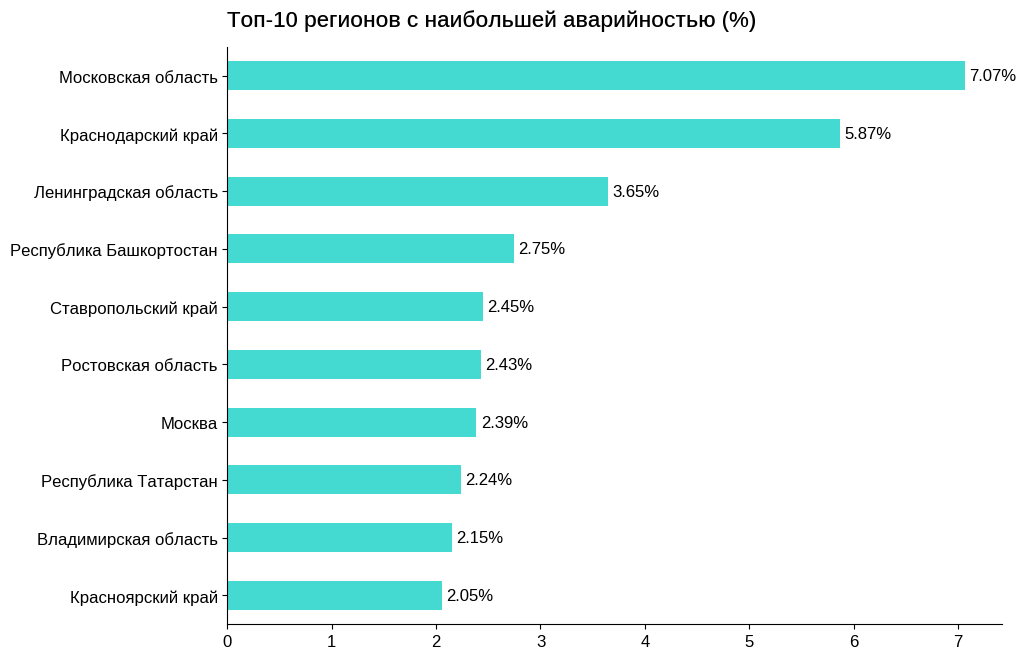

In [16]:
# Визуализируем
ax = dtp_count2.tail(10).plot(kind='barh',
                              title='Топ-10 регионов с наибольшей аварийностью (%)',
                              legend=False,
                              x='region_name',
                              y='perc',
                              color = color,
                             )
plt.ylabel(None)
ax.bar_label(ax.containers[0], fmt='{:.2f}%', padding=padding, fontsize=12)
plt.show()

In [17]:
y_perc = []
for label in ax.bar_label(ax.containers[0]):
    y_perc.append(label.get_text())

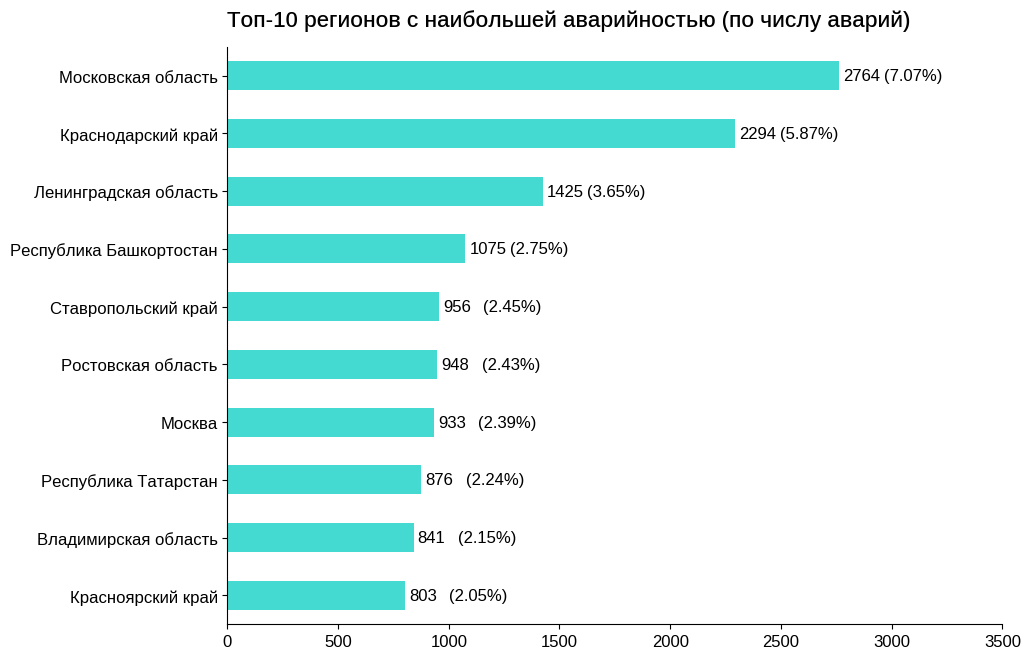

In [18]:
# Объединим
ax2 = dtp_count.tail(10).plot(kind='barh',
                             figsize=(10, 7.5),
                             legend=False,
                             zorder=2,
                             color='#45DAD1'
                            )

ax2.set_xlim(0, get_value(ax2, -1) + get_value(ax2, 1))

plt.bar_label(ax2.containers[0], padding=padding, fontsize=12)
plt.ylabel(None)
plt.title(label='Топ-10 регионов с наибольшей аварийностью (по числу аварий)')

x_values = dtp_count.tail(10).values
y_values = range(10)

for x, y, mark in zip(x_values, y_values, y_perc):
    ax2.text(x+200, y, f'({round(float(mark), 2)}%)', ha='left', va='center', fontsize=12)

plt.show()

В лидерах вовсе не Москва и не Санкт-Петербург, как мы могли предположить. Возможно в данных есть ошибка или аномалии, которые не были обнаружены на этапе предобработки, а может быть с данным все в порядке и продолжив исследование, мы найдем причину.

### 2. Определить распределение числа ДТП по типам дорог, по видам ДТП.

2.1  Постройте столбчатую диаграмму числа ДТП по типам дорог.<br>
2.2  Постройте столбчатую диаграмму числа ДТП по видам ДТП, оставьте топ-5.





In [19]:
road_type = data[data['road_type'] != 'отсутствует']['road_type'].value_counts(ascending=True)

new_index = ['Федеральная дорога\nобщего пользования', 'Региональная или межмуниципальная\nдорога общего пользования']
road_type.index = new_index

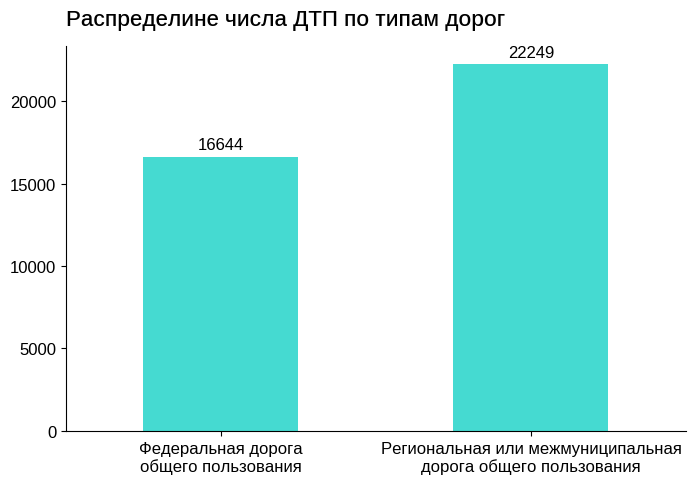

In [20]:
ax = road_type.plot(kind='bar',
                    figsize=(8, 5),
                    legend=False,
                    title='Распределине числа ДТП по типам дорог',
                    color = color
                   )
plt.xlabel(None)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], padding=padding, fontsize=bar_label)

plt.show()

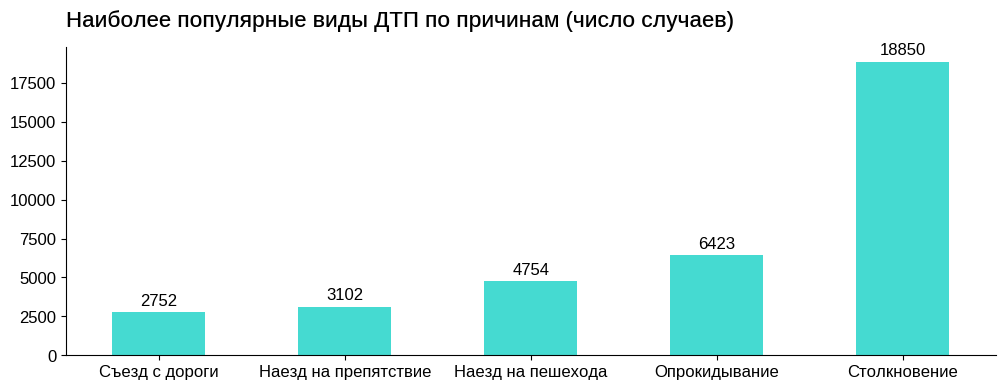

In [21]:
crash_type_name = data['crash_type_name'].value_counts(ascending=True).tail(5)
ax = crash_type_name.plot(kind='bar',
                         figsize=(12, 4),
                          title='Наиболее популярные виды ДТП по причинам (число случаев)',
                          legend=False,
                          color=color
                         )
plt.xlabel(None)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], padding=padding, fontsize=12)
plt.show()

### 3. Исследовать зависимость числа ДТП от дня недели.

In [22]:
#3
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']


In [23]:
crash_date_day = data['crash_date_day'].value_counts().reindex(days)

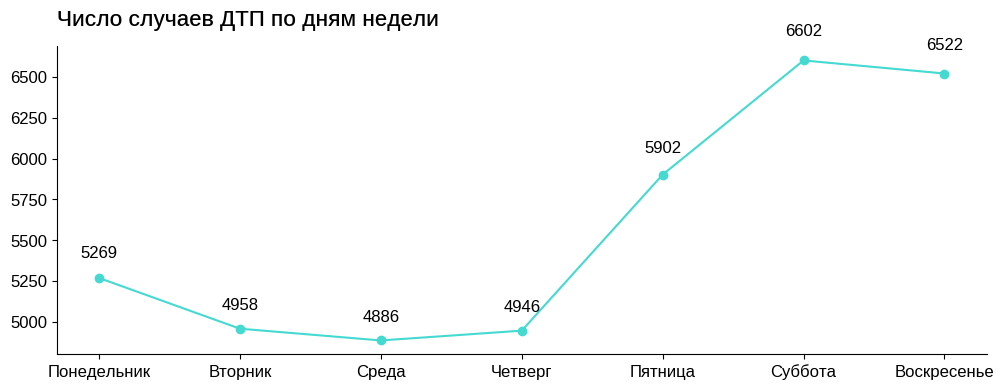

In [24]:
ax = crash_date_day.plot(kind='line',
                         figsize=(12, 4),
                         title='Число случаев ДТП по дням недели',
                         legend=False,
                         style='o-',
                         xlabel='',
                         # ylabel='Число ДТП',
                         color=color
                        )

x_values = range(len(crash_date_day))
y_values = crash_date_day.values

for x, y in zip(x_values, y_values):
    ax.text(x, y*1.02, y, ha='center', va='bottom', fontsize=12)

plt.show()

### 4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.

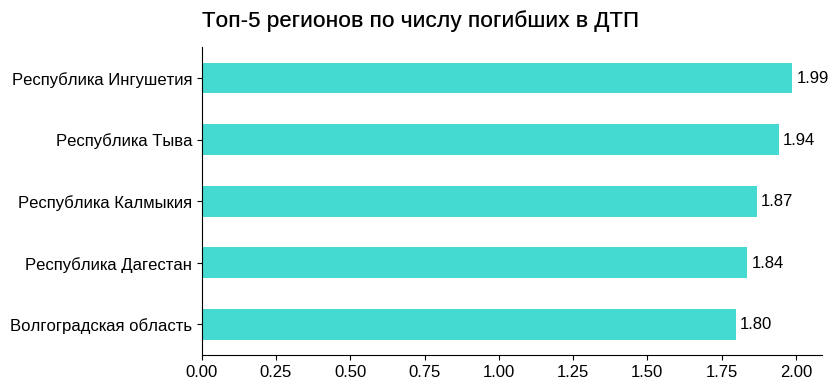

              region_name  fatalities_amount
7   Волгоградская область           1.798419
46    Республика Дагестан           1.837037
48    Республика Калмыкия           1.867816
57        Республика Тыва           1.942308
47   Республика Ингушетия           1.987805 None


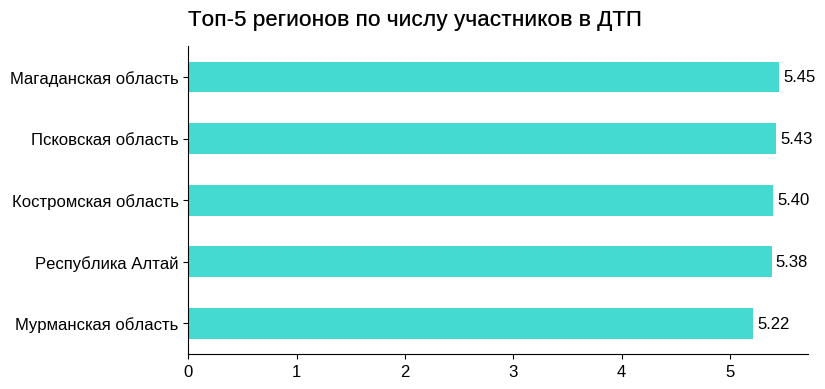

            region_name  participants_amount
31   Мурманская область             5.217054
43     Республика Алтай             5.384615
21  Костромская область             5.396104
41    Псковская область             5.428144
28  Магаданская область             5.451220 None


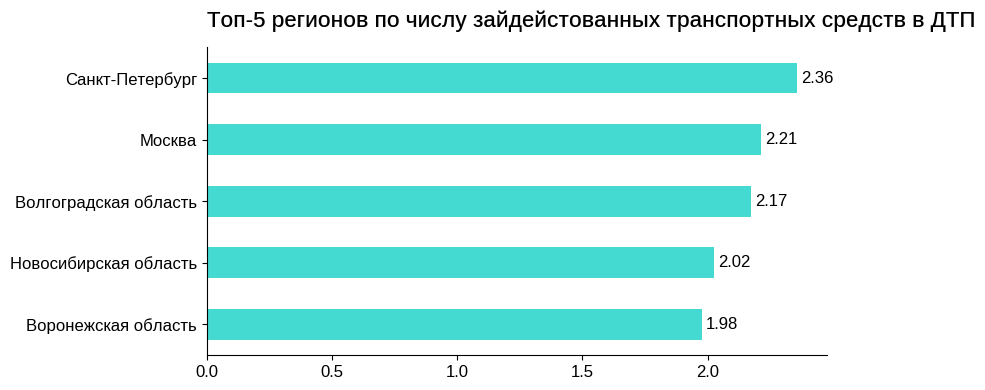

              region_name  vehicles_amount
9     Воронежская область         1.975806
34  Новосибирская область         2.024283
7   Волгоградская область         2.173913
29                 Москва         2.212219
62        Санкт-Петербург         2.357955 None


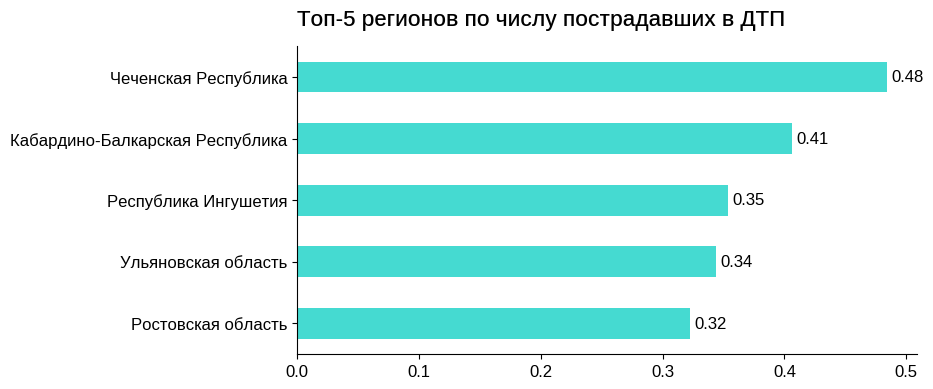

                        region_name  victims_amount
59               Ростовская область        0.322785
75              Ульяновская область        0.343972
47             Республика Ингушетия        0.353659
14  Кабардино-Балкарская Республика        0.406504
79             Чеченская Республика        0.484536 None


In [25]:
df = data.pivot_table(index='region_name',
                      aggfunc='mean',
                      values=['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']
                      ).reset_index()
title = {'fatalities_amount': 'Топ-5 регионов по числу погибших в ДТП',
         'victims_amount': 'Топ-5 регионов по числу пострадавших в ДТП',
         'vehicles_amount': 'Топ-5 регионов по числу зайдейстованных транспортных средств в ДТП',
         'participants_amount': 'Топ-5 регионов по числу участников в ДТП',
        }


for col in df.columns[1:]:
    df2 = df[['region_name', col]].sort_values(by=col, ascending=True).tail(5)
    ax = df2.plot(kind='barh',
                  figsize=(8, 4),
                  title=title[col],
                  legend=False,
                  x='region_name',
                  y=col,
                  color=color
                 )
    ax.bar_label(ax.containers[0], fmt='{:.2f}', padding=padding, fontsize=12)
    plt.ylabel(None)
    print(df2, plt.show())

### 5. Исследовать время ожидания сотрудников ДПС.

<Axes: >

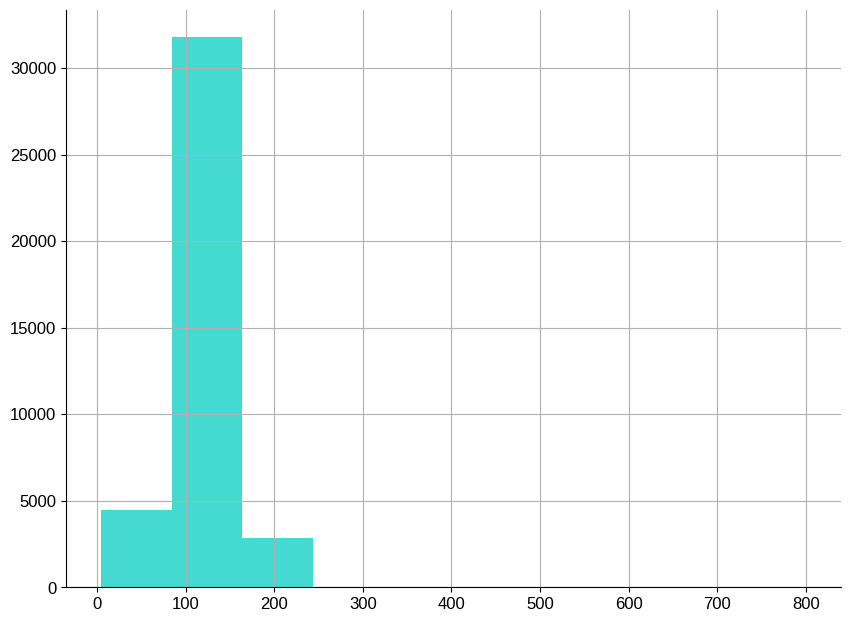

In [26]:
data['wait_time'].hist()

Можно заметить, что значения по оси абсцисс распределяются до 800, хотя мы видим только до 200, что говорит о наличии выбросов

<Axes: >

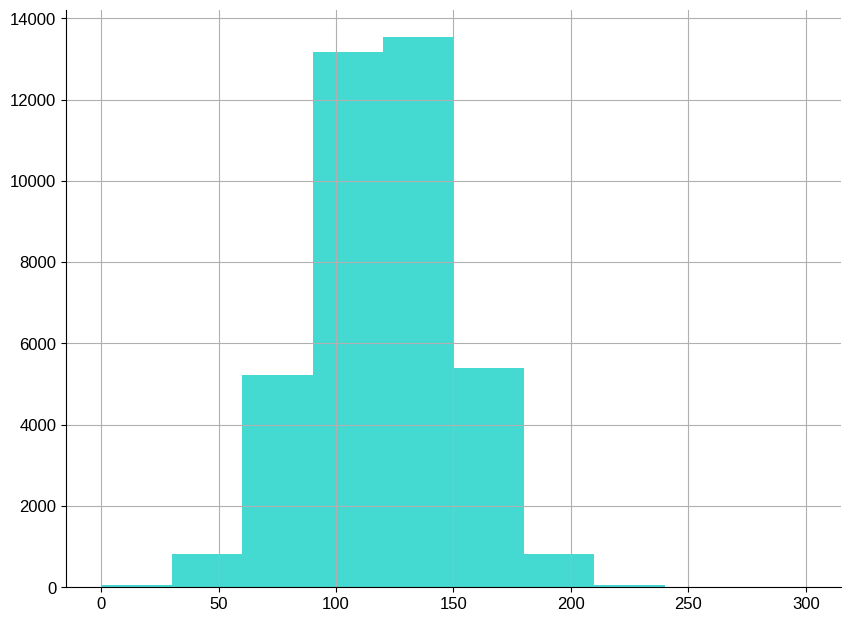

In [27]:
# Построим гистограмму времени ожидания ДПС
data['wait_time'].hist(range=(0, 300))

Само распределение времени ожидания сотрудников похоже на нормальное 

<Axes: xlabel='region_name', ylabel='wait_time'>

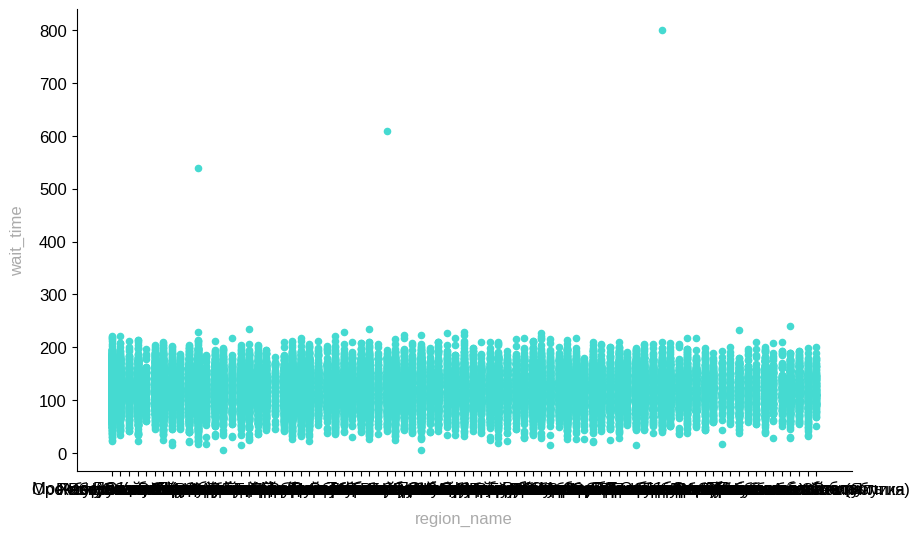

In [28]:
# Убедимся в наличии/отсутствии выбросов
data.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 6))

Сформулируем выводы:
- Распределение значений по столбцу wait_time похоже на нормальное
- В распределении присутствуют выбросы

Построим boxplot для времени ожидания

<Axes: >

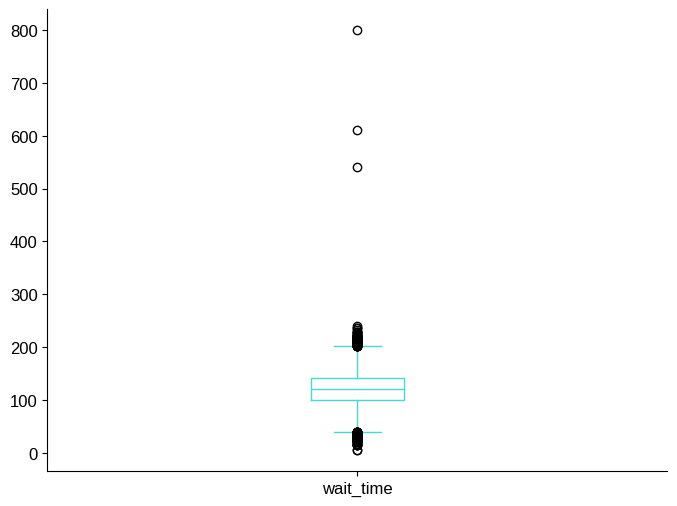

In [29]:
# Построим boxplot для исследования выбросов времени ожидания
data['wait_time'].plot(kind='box', figsize=(8, 6)) 

<Axes: >

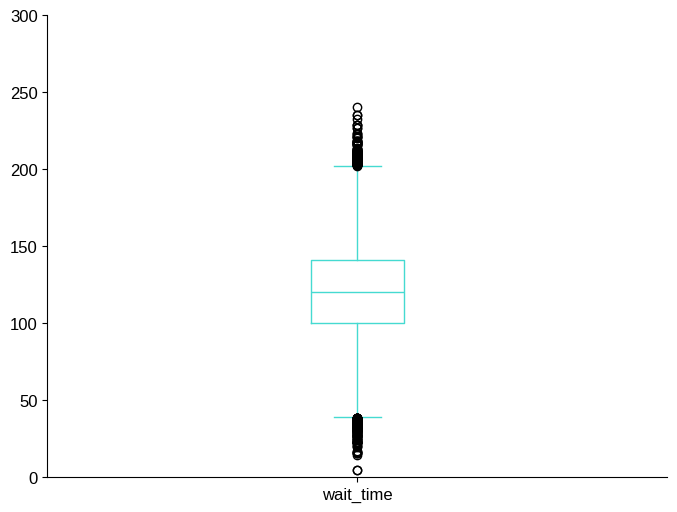

In [30]:
data['wait_time'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 300)
                      )

In [31]:
data['wait_time'].describe()

count    39085.000000
mean       120.405894
std         30.347460
min          4.748831
25%        100.007374
50%        120.524415
75%        140.796472
max        800.000000
Name: wait_time, dtype: float64

In [32]:
# Для определеиня выбросов, напишем функцию
def ejection(col):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = data[col][(data[col] > ejection_h) | (data[col] < ejection_l)].count()
    ejection_perc = ejection_count / len(data) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)


In [33]:
ejection('wait_time')

(np.float64(201.9801186935365),
 np.float64(38.823726829941734),
 np.int64(259),
 np.float64(0.662658308814123))

In [34]:
# Выше мы нашли число выбросов, перевернем условия, чтобы отфильтровать датасет без них
good_data_wait_time = data[(data['wait_time'] < ejection('wait_time')[0]) & (data['wait_time'] > ejection('wait_time')[1])]
good_data_wait_time = good_data_wait_time.reset_index(drop=True)
good_data_wait_time.head(3)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987


In [35]:
# Проверим на всякий, все ли корректно
print(len(data) - len(good_data_wait_time))
print(ejection('wait_time')[2])

259
259


<function matplotlib.pyplot.show(close=None, block=None)>

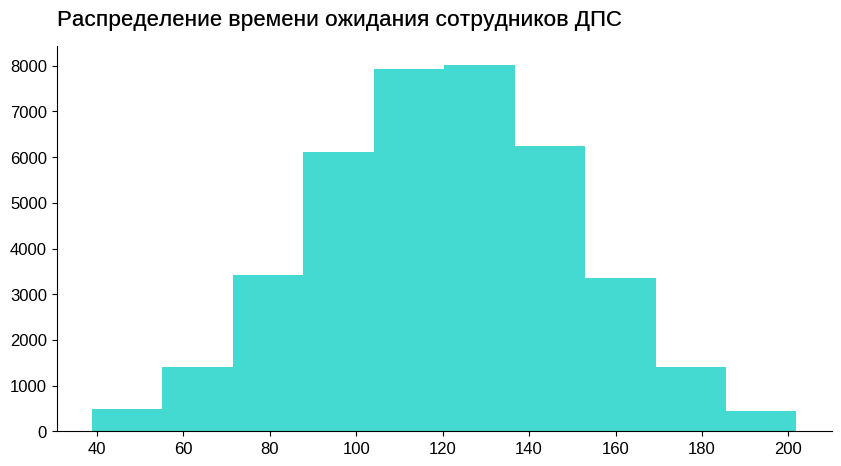

In [36]:
# проверим, что изменилось на графиках
plt.figure(figsize=(10, 5))

good_data_wait_time['wait_time'].hist()

plt.title('Распределение времени ожидания сотрудников ДПС')
plt.grid(False)
plt.show

In [37]:
# проверим describe
good_data_wait_time['wait_time'].describe()

count    38826.000000
mean       120.379495
std         29.160773
min         38.858157
25%        100.174698
50%        120.526717
75%        140.621013
max        201.878534
Name: wait_time, dtype: float64

<Axes: >

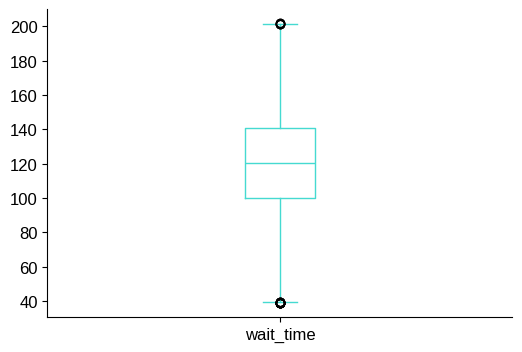

In [38]:
# построим box
good_data_wait_time['wait_time'].plot(kind='box', figsize=(6, 4))

<Axes: xlabel='region_name', ylabel='wait_time'>

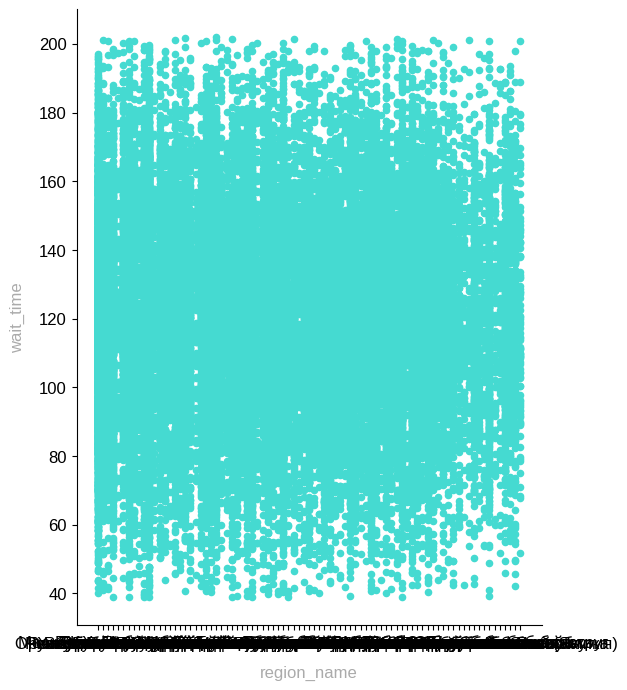

In [39]:
# построим scatter
good_data_wait_time.plot(kind='scatter', figsize=(6, 8), x='region_name', y='wait_time')

Выбросы по признаку времени ожидания устранены. Данные готовы для проведения статистического анализа и/или построения модели прогноза времени ожидания сотрудников ДПС.

### Дополнительное задание 1
1. Определить регионы с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране.
2. Постройте гистограмму.
2. Постройте столбчатые диаграммы. 

In [40]:
total_mean = good_data_wait_time['wait_time'].mean()

region_wait_time = good_data_wait_time.groupby('region_name')['wait_time'].apply(lambda x: x.mean() - total_mean).sort_values(ascending=True)
region_wait_time

region_name
Республика Тыва           -3.568905
Курганская область        -3.489587
Ярославская область       -3.184884
Архангельская область     -2.986150
Смоленская область        -2.268936
                             ...   
Санкт-Петербург            2.854031
Алтайский край             2.900547
Ульяновская область        2.994815
Калининградская область    3.360278
Республика Марий Эл        3.667900
Name: wait_time, Length: 83, dtype: float64

<Axes: >

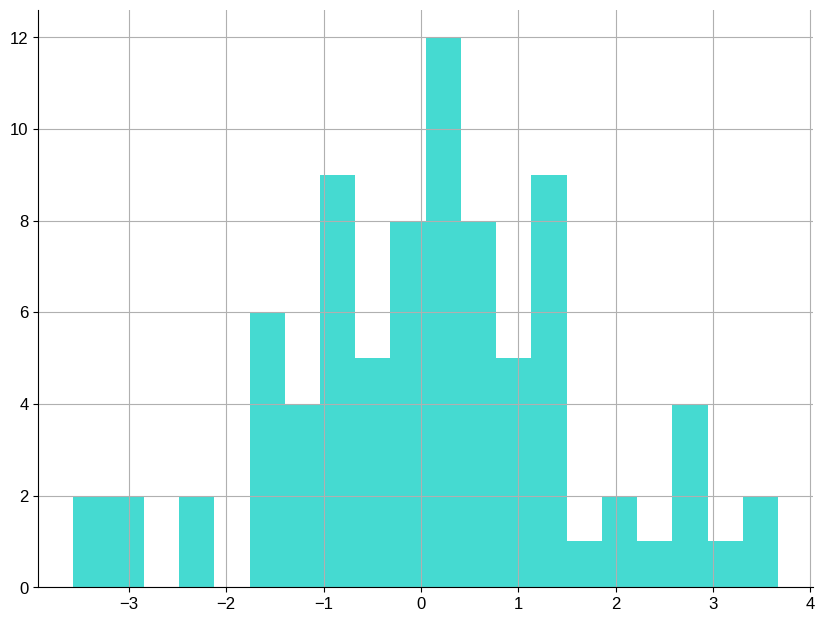

In [41]:
region_wait_time.hist(bins=20)

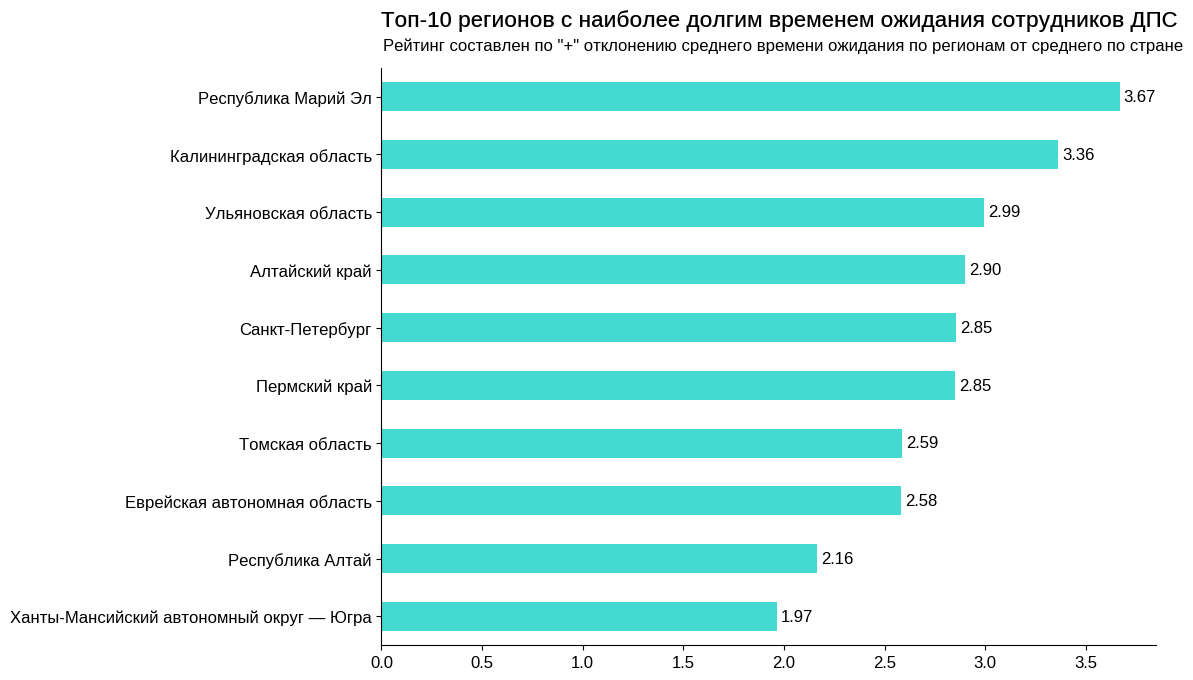

In [42]:
ax = region_wait_time.tail(10).plot(kind='barh',
                                    # figsize=(8, 6),
                                    color=color
                                   )
plt.ylabel(None)
plt.title(label='Топ-10 регионов с наиболее долгим временем ожидания сотрудников ДПС', pad=30)
ax.text(0.01, 9.8, 'Рейтинг составлен по "+" отклонению среднего времени ожидания по регионам от среднего по стране', fontsize=12)
ax.bar_label(ax.containers[0], fmt='{:.2f}', padding=padding, fontsize=12)
plt.show()

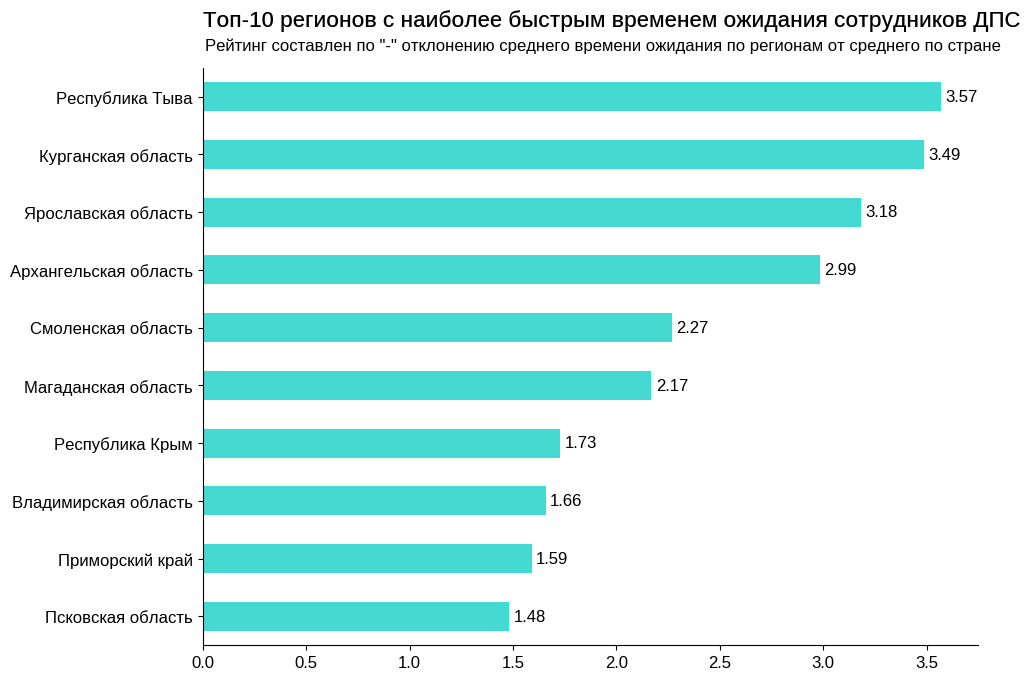

In [43]:
ax = (region_wait_time.sort_values(ascending=False).tail(10) * (-1)).plot(kind='barh',
                                                                          # figsize=(8, 6),
                                                                          color=color
                                                                          )
plt.ylabel(None)
plt.title(label='Топ-10 регионов с наиболее быстрым временем ожидания сотрудников ДПС', pad=30)
ax.text(0.01, 9.8, 'Рейтинг составлен по "-" отклонению среднего времени ожидания по регионам от среднего по стране', fontsize=12)
ax.bar_label(ax.containers[0], fmt='{:.2f}', padding=padding, fontsize=12)
plt.show()

### 6. Исследование числа участников ДТП

<Axes: >

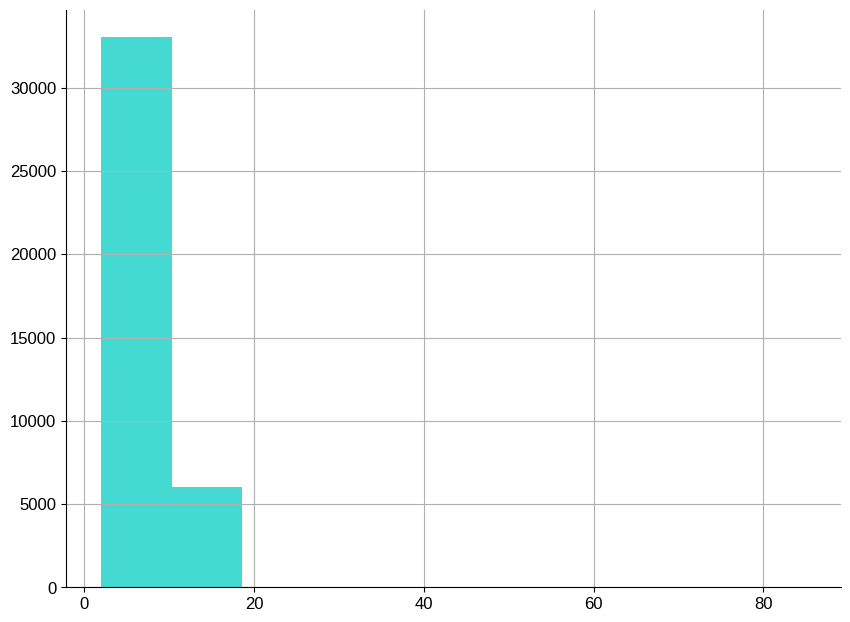

In [44]:
# построим гистограмму 'participants_amount'
data['participants_amount'].hist()

<function matplotlib.pyplot.show(close=None, block=None)>

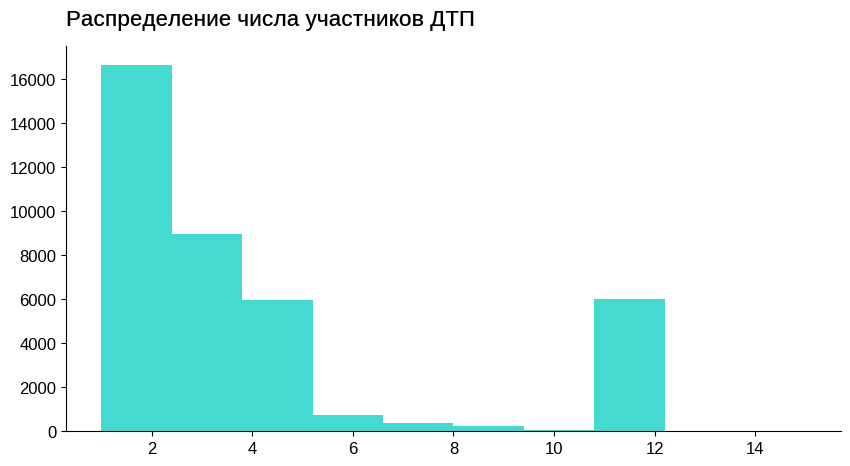

In [45]:
plt.figure(figsize=(10, 5))

data['participants_amount'].hist(range=(1, 15))

plt.title('Распределение числа участников ДТП')
plt.grid(False)
plt.show

<b>Cформулируем выводы:<b>
- Присутствуют выбросы
- Наблюдается правосторонняя асимметрия, так как хвост смещен вправо
- Почему так часто наблюдается значение 12, в то время как соседние значения равны крайне малы
- Следовательно, мода < медиана < среднее

<Axes: xlabel='region_name', ylabel='participants_amount'>

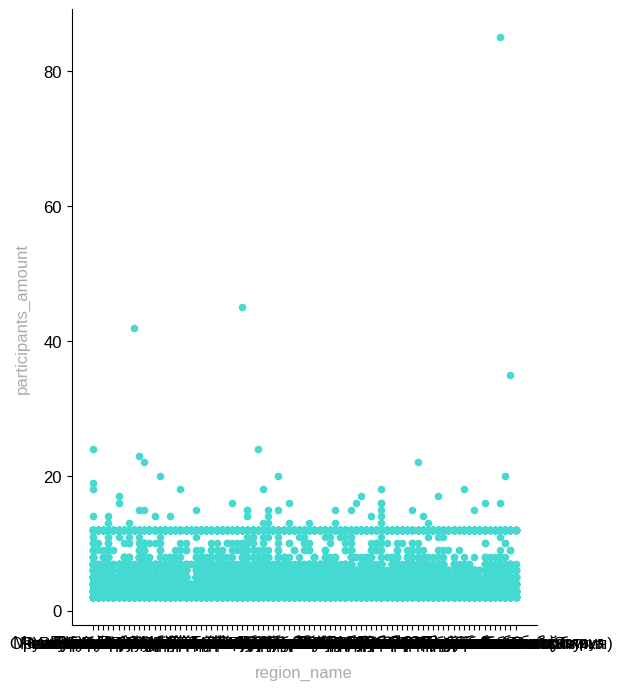

In [46]:
data.plot(kind='scatter',
          figsize=(6, 8),
         x='region_name',
          y='participants_amount',
         )

<Axes: >

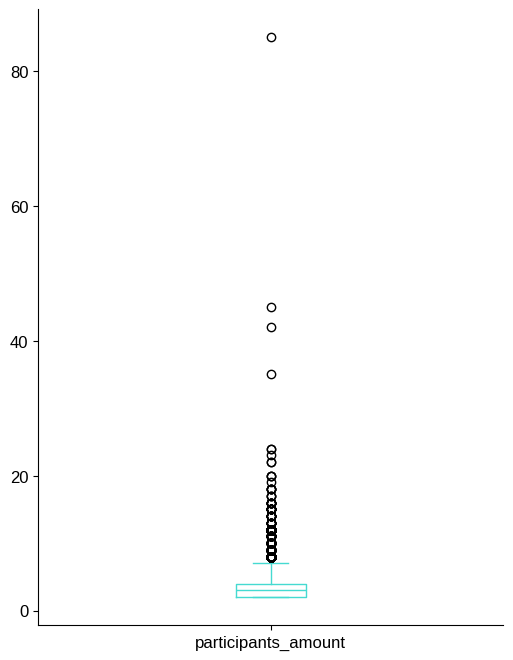

In [47]:
data['participants_amount'].plot(kind='box', figsize=(6,8))

<Axes: >

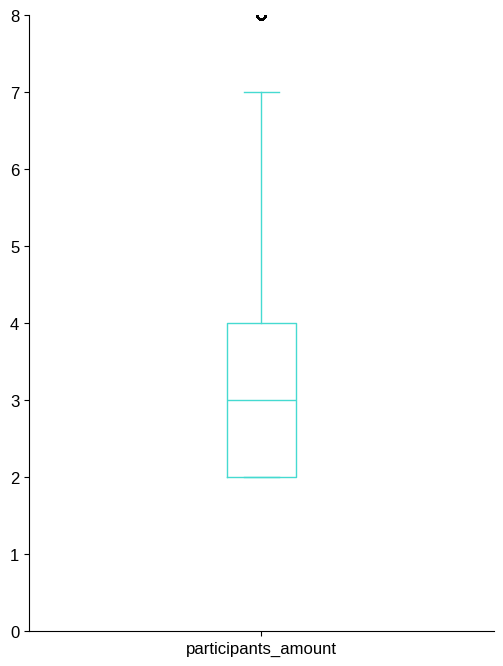

In [48]:
data['participants_amount'].plot(kind='box', figsize=(6,8), ylim=(0, 8))

Теперь хорошо виден сам ящик. Так как значения переменной - целые числа, то 
1. Медиана = 3
2. 25-й перцентиль = 2
3. 75-й перцентиль = 4
4. IQR = 7
5. Выбросы > 7

In [49]:
data['participants_amount'].describe()

count    39085.000000
mean         4.316259
std          3.537298
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         85.000000
Name: participants_amount, dtype: float64

In [50]:
ejection('participants_amount')

(np.float64(7.0),
 np.float64(-1.0),
 np.int64(6359),
 np.float64(16.269668670845594))

Получилось слишком много выбросов при использовании IQR: выбросы составляют около 16% от всего датасета.<br>
Следовательно, найдем квантиль правее

In [51]:
# Определим 95%-ый квантиль
participants_amount_ejection_h = np.percentile(data['participants_amount'], 95)
participants_amount_ejection_h

np.float64(12.0)

In [52]:
# Число выбросов
participants_amount_count = data['participants_amount'][data['participants_amount'] > participants_amount_ejection_h].count()
participants_amount_count 

np.int64(59)

In [53]:
# Процент выбросов
participants_amount_count / len(data) * 100

np.float64(0.15095305104259946)

1. Уберем выбросы

In [54]:
good_data_participants_amount = data[data['participants_amount'] <= participants_amount_ejection_h]

In [55]:
good_data_participants_amount = good_data_participants_amount.reset_index(drop=True)

In [56]:
# Проверим, все ли совпало
len(data) - len(good_data_participants_amount)

59

2. Ищем ответ на вопрос, почему так часто встречаются ДТП с 12 участниками, в то время как с 11 и 13 ДТП крайне малы

In [57]:
good_data_participants_amount[good_data_participants_amount['participants_amount'] == 12].head()

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
11,79,Республика Адыгея,М-4,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",Федеральная дорога общего пользования,"ЮФО, Республика Адыгея, Теучежский район",Опрокидывание,20181231,21:00:00,Несоответствие скорости конкретным условиям дв...,1,0,1,12,2018-12-31 21:00:00,Понедельник,157.929067
26,17,Владимирская область,М-7,"""Волга"" Москва - Владимир - Нижний Новгород - ...",Федеральная дорога общего пользования,"ЦФО, Владимирская область, Камешковский район",Наезд на препятствие,20181231,19:25:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 19:25:00,Понедельник,108.084983
41,22,Нижегородская область,М-7,"""Волга"" Москва - Владимир - Нижний Новгород - ...",Федеральная дорога общего пользования,"ПФО, Нижегородская область, Кстовский район",Наезд на препятствие,20181231,17:20:00,Несоответствие скорости конкретным условиям дв...,1,0,1,12,2018-12-31 17:20:00,Понедельник,120.166369
43,33,Кировская область,отсутствует,Киров - Кирово-Чепецк - Зуевка - Фаленки - Дем...,Региональная или межмуниципальная дорога общег...,"ПФО, Кировская область, Зуевский район",Опрокидывание,20181231,16:45:00,Несоответствие скорости конкретным условиям дв...,1,0,1,12,2018-12-31 16:45:00,Понедельник,87.642293


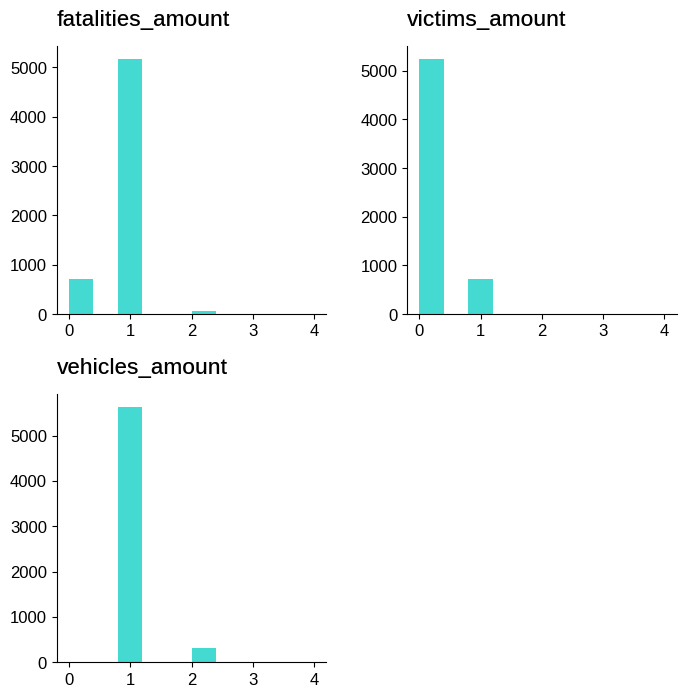

In [58]:
good_data_participants_amount[good_data_participants_amount['participants_amount'] == 12]\
[['fatalities_amount', 'victims_amount', 'vehicles_amount']].hist(range=(0, 4), figsize=(8, 8), grid=False)

# good_data_participants_amount[good_data_participants_amount['participants_amount'] == 11]\
# [['fatalities_amount', 'victims_amount', 'vehicles_amount']].hist(range=(0, 4), figsize=(8, 8), grid=False)


# good_data_participants_amount[good_data_participants_amount['participants_amount'] == 13]\
# [['fatalities_amount', 'victims_amount', 'vehicles_amount']].hist(range=(0, 4), figsize=(8, 8), grid=False)
plt.show()

In [59]:
good_data_participants_amount[good_data_participants_amount['participants_amount'] == 12]['crash_type_name'].value_counts()

crash_type_name
Опрокидывание                                                                                                                     2980
Наезд на препятствие                                                                                                              1503
Съезд с дороги                                                                                                                    1221
Наезд на животное                                                                                                                  156
Наезд на стоящее ТС                                                                                                                 45
Иной вид ДТП                                                                                                                        29
Столкновение                                                                                                                        17
Наезд на внезапно возникшее препятствие

<b>Выводы<b>:
- Для записей, где всего в ДТП участвует 12 участников, есть зависимость. Для таких записей данные о числе погибших, потерпевших и транспортных средсв относительно похоже распределены . Следовательно, большое число записей с количеством участников - 12 связано с тем, что для характерного случая ДТП требуется данное число участников.
- Так как, в частности, участников ДТП 12, 1 транспортное средство задействовано, а наиболее частая причина ДТП - опрокидование, то можно предположить, что такие случае часто связаны с автобусами и микроавтобусами.
- Для записей, где участвуют 11 человек подобных зависимостей не найдено, для 10 - в принципе отсутствуют такие данные.

### Дополнительное задание 2:
1. Для столбцов 'fatalities_amount','vehicles_amount','vehicles_amount' построить диаграммы размаха, определить экстремальные выбросы (параметр для np.percentile установить 99,9), установить число таких значений и процент от датасета. Реализовать в цикле.
2. Примите решение об удалении выбросов.

<Axes: xlabel='region_name', ylabel='fatalities_amount'>

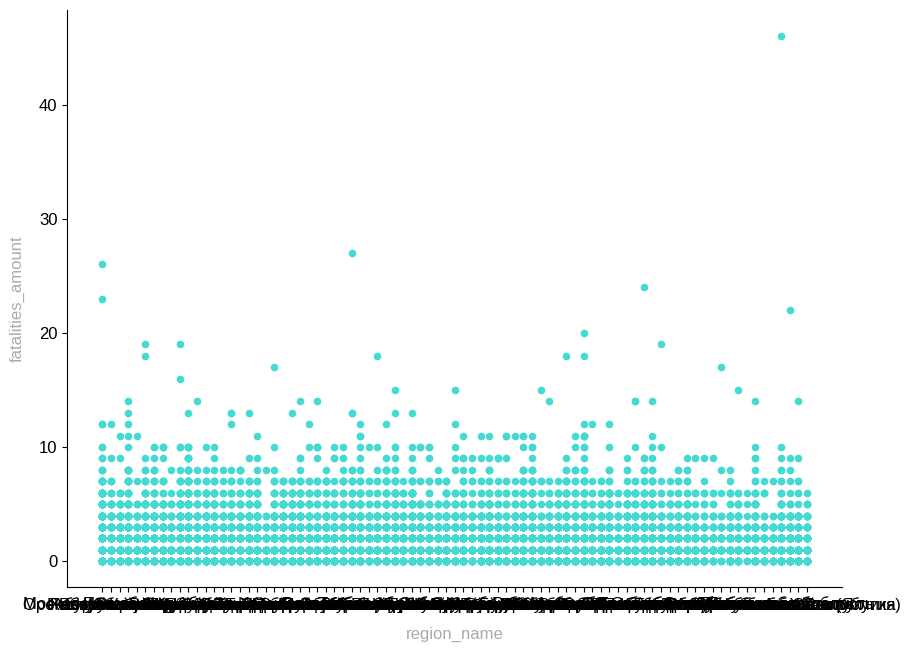

In [60]:
data.plot(kind='scatter',
         x='region_name',
          y='fatalities_amount'
         )

<Axes: >

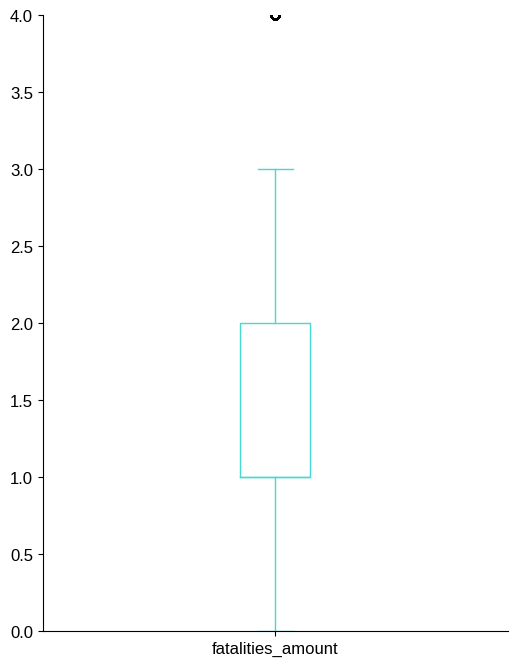

In [61]:
data['fatalities_amount'].plot(kind='box',
                               figsize=(6, 8),
                              ylim=(0, 4)
                              )

In [62]:
data['victims_amount'].describe()

count    39085.000000
mean         0.232698
std          0.591504
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: victims_amount, dtype: float64

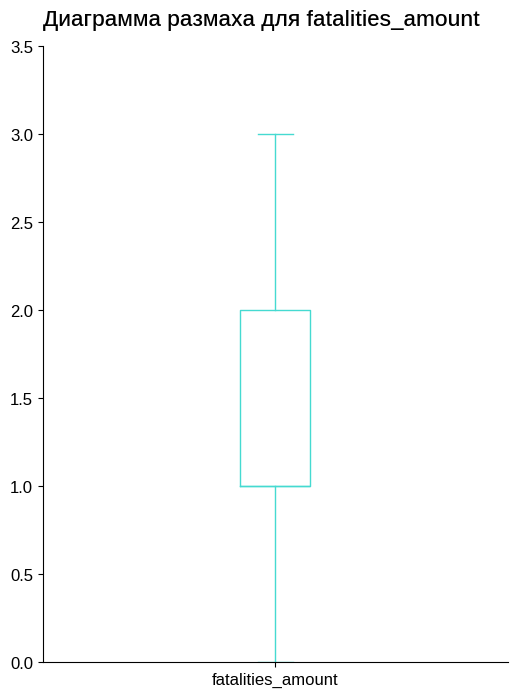

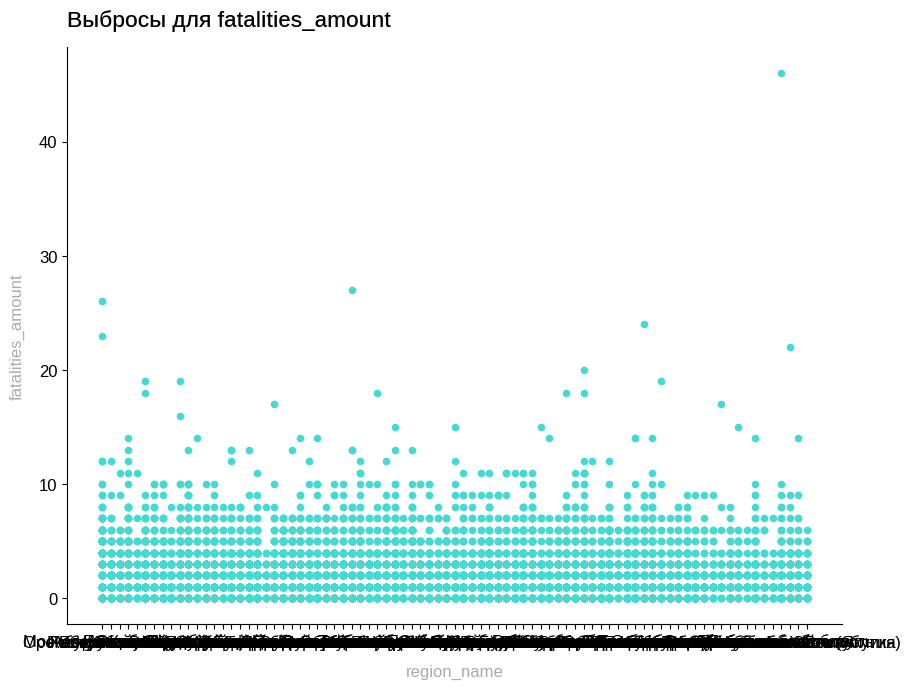

Столбец: fatalities_amount, q99.9: 13.0, ejection_count: 31, ejection_perc: 0.07931431495458616
None


D:\programs\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:772: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(self.ylim)


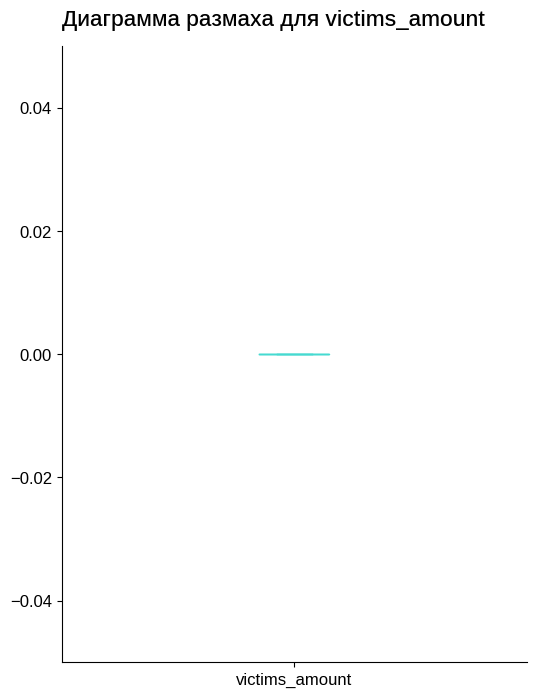

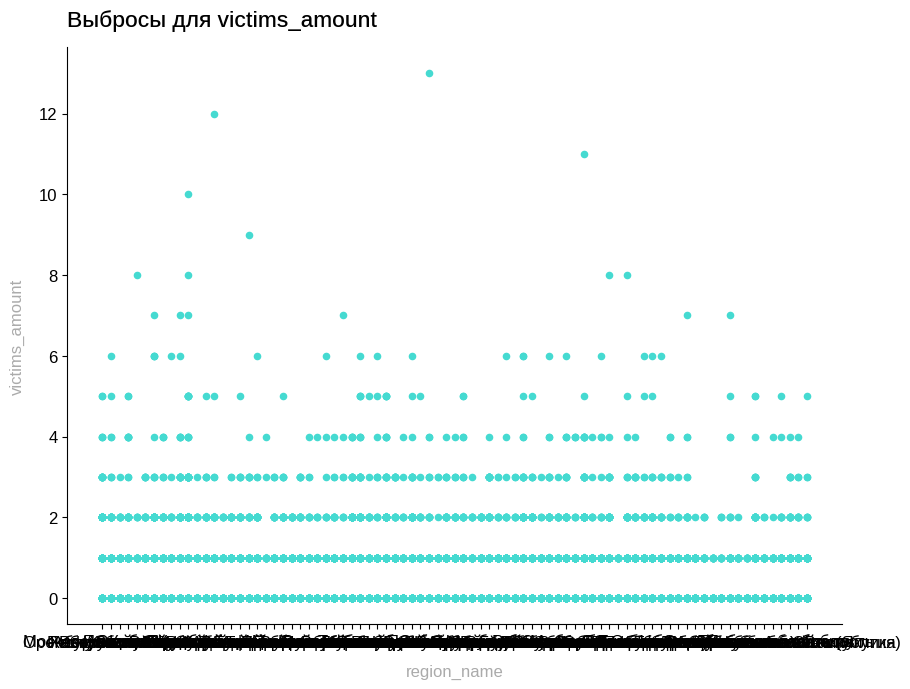

Столбец: victims_amount, q99.9: 5.0, ejection_count: 35, ejection_perc: 0.08954842011001664
None


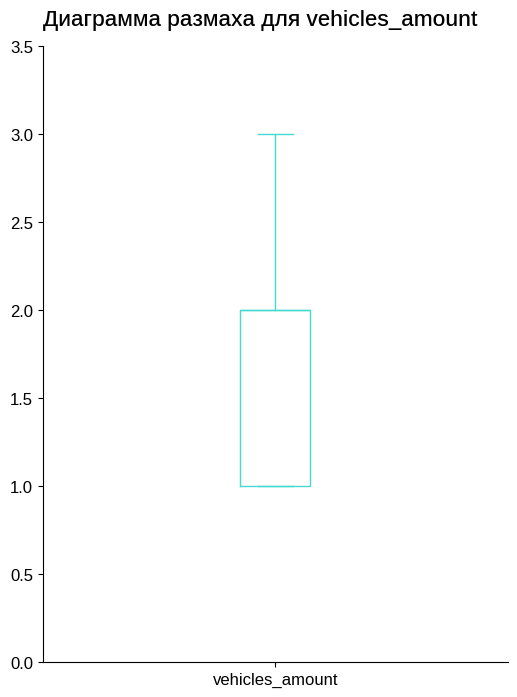

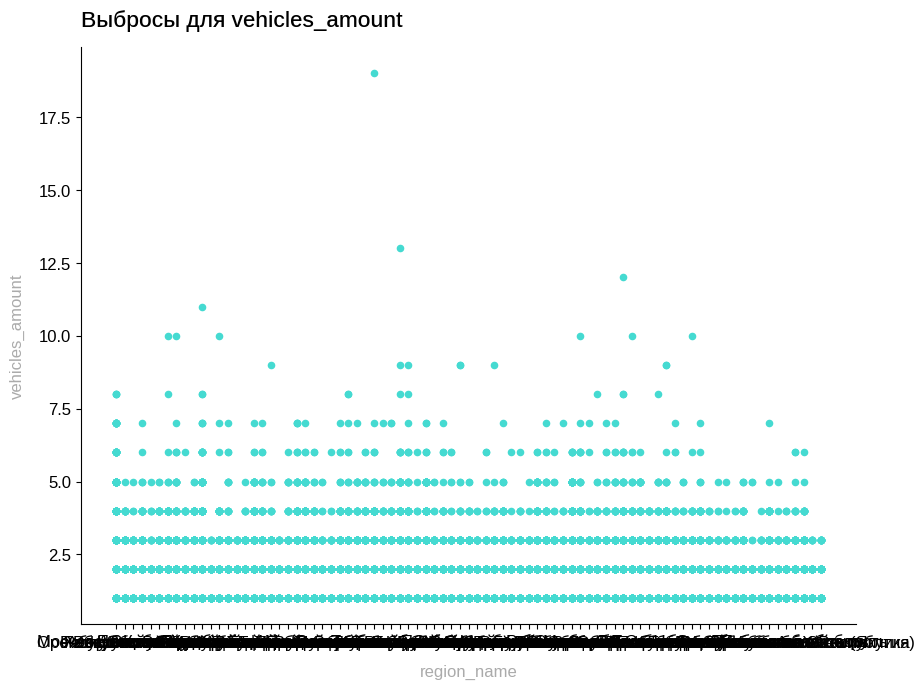

Столбец: vehicles_amount, q99.9: 7.0, ejection_count: 32, ejection_perc: 0.08187284124344378
None


In [63]:
ejection_dict = {}

for col in data.columns[10:13]:
    col_amount_ejection_h = np.percentile(data[col], 99.9)
    col_amount_count = data[col][data[col] > col_amount_ejection_h].count()
    col_amount_perc = col_amount_count / len(data) * 100
    ejection_dict[col] = col_amount_ejection_h
    
    box_col = data[col].plot(kind='box',
                               figsize=(6, 8),
                              ylim=(0, ejection(col)[0]),
                             title=f'Диаграмма размаха для {col}'
                              )
    
    scatter_col = data.plot(kind='scatter',
                            x='region_name',
                            y=col,
                            title=f'Выбросы для {col}',
                           )
    
    print(f'Столбец: {col}, q99.9: {col_amount_ejection_h}, ejection_count: {col_amount_count}, ejection_perc: {col_amount_perc}',
          plt.show(),
          sep='\n')

<b>Выводы:
- Для каждого из представленных наборов данных для исследования выбросы составляют крайне малую часть (около 0.08-0.09%)
- Для результатов исследования, требующих агрегированных данных, эти выбросы не будут нести пользы, поэтому следуюет исключить их для таких выводов
- однако некоторые из данных выбросов могут представлять нестандартные ситуации на дороге (например, ДТП, влекущие множества жертв и т.п. - такие случаи происходят не каждый день, однако подлежат исследованию). Следовательно, стоит пометить данные выбросы
- Для агрегированных результатов не принимаем во внимание помеченные выбросами записи, для нестандартных исследуем данные записи

In [64]:
ejection('wait_time')[0]

np.float64(201.9801186935365)

In [65]:
ejection_dict

{'fatalities_amount': np.float64(13.0),
 'victims_amount': np.float64(5.0),
 'vehicles_amount': np.float64(7.0)}

In [66]:
data2 = data.copy()

In [67]:
# Дополним словарь всех границ для определения выбросов
ejection_dict['wait_time'] = (ejection('wait_time')[1], ejection('wait_time')[0])
ejection_dict['participants_amount'] = participants_amount_ejection_h

In [68]:
ejection_dict

{'fatalities_amount': np.float64(13.0),
 'victims_amount': np.float64(5.0),
 'vehicles_amount': np.float64(7.0),
 'wait_time': (np.float64(38.823726829941734), np.float64(201.9801186935365)),
 'participants_amount': np.float64(12.0)}

In [69]:
ejection_name = {'fatalities_amount': 'ejection_fatalities_amount',
                 'victims_amount': 'ejection_victims_amount',
                 'vehicles_amount': 'ejection_vehicles_amount',
                 'wait_time': 'ejection_wait_time',
                 'participants_amount': 'ejection_participants_amount'}

In [70]:
# Создадим нулевые булевы столбцы
data2[['ejection_fatalities_amount',
       'ejection_victims_amount',
       'ejection_vehicles_amount' ,
       'ejection_participants_amount',
       'ejection_wait_time']] = '0'

In [71]:
# Для каждого столбцы найдем выбросы, пометим их единицей
for col in list(ejection_dict.keys()):
    if type(ejection_dict[col]) == type(()):
        data2.loc[(data2[col] < ejection_dict[col][0]) | (data2[col] > ejection_dict[col][1]), ejection_name[col]] = '1'
    else:
        data2.loc[data2[col] > ejection_dict[col], ejection_name[col]] = '1'

In [72]:
# Сложим в отдельный столбец-фильтр
data2['ejection'] = data2['ejection_fatalities_amount'] + \
                    data2['ejection_victims_amount'] + \
                    data2['ejection_vehicles_amount'] + \
                    data2['ejection_participants_amount'] + \
                    data2['ejection_wait_time']

Теперь можно фильтровать датасет для разных целей, когда могут понадобиться данные, относящиеся к выбросам, и когда - нет

In [73]:
data = pd.read_excel('dtp_good_vo_eject.xlsx')

### 7. Исследовать ДТП в ночное время суток

1. Определите число  наездов на пешехода в московской области.	
2. Какой процент ДТП, составляют ДТП, произошедшие в ночное время суток (от 0 до 5 часов  включительно).Постройте гистограмму числа ДТП по часам 
3. Постройте гистограмму числа ДТП со смертельным исходом для столкновений по часам.
4. Используя срезы данных, сравните число ДТП со смертельным исходом в будни (кроме пятницы), отдельно в пятницу и в выходные 
дни.


In [74]:
#1
len(data.query('region_name == "Московская область" and crash_type_name == "Наезд на пешехода"'))

535

In [75]:
#2
data['hour'] = data['datetime'].dt.hour
len(data.query('0 <= datetime.dt.hour <= 5')) / len(data) * 100

12.267380505006306

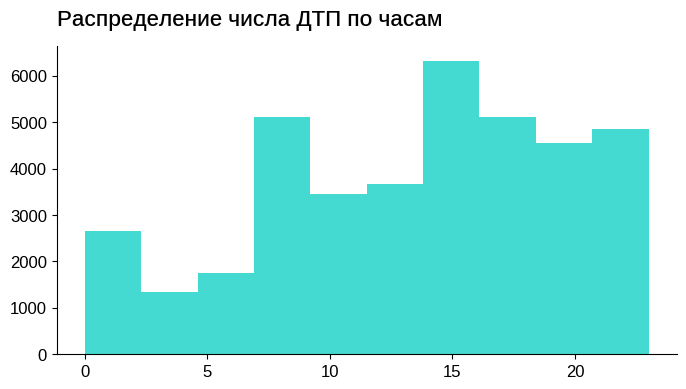

In [76]:
data['datetime'].dt.hour.hist(grid=False, figsize=(8, 4))
plt.title('Распределение числа ДТП по часам')
plt.show()

<Axes: >

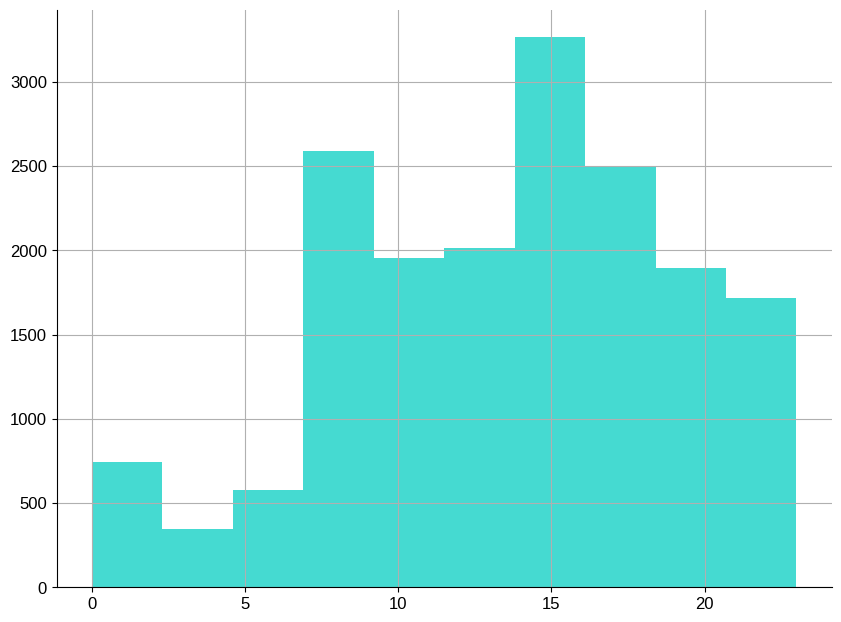

In [77]:
#3
data.query('fatalities_amount > 0 and crash_type_name == "Столкновение"')['datetime'].dt.hour.hist()

In [78]:
weekday = ["Пятница", "Суббота", "Воскресенье"]

In [79]:
#4
print('Число ДТП со смертельным исходом:',
    f'в будние дни, кроме пятницы: {len(data.query('not crash_date_day.isin(@weekday) and fatalities_amount > 0'))}',
    f'в пятницу: {len(data.query('crash_date_day == "Пятница" and fatalities_amount > 0'))}',
    f'в выходные дни: {len(data.query('crash_date_day.isin(["Суббота", "Воскресенье"]) and fatalities_amount > 0'))}',
    sep='\n'
)

Число ДТП со смертельным исходом:
в будние дни, кроме пятницы: 17879
в пятницу: 5256
в выходные дни: 11744


### 8. Определить наиболее опасные дороги.

1. Определите самую опасную дорогу в России (по числу погибших) (road_code) отдельно для двух разных типов дорог. (федеральной и региональной)
2. Определите дорогу, которая пересекает наибольшее число регионов. не забудьте исключить отсутствующий тип дороги.
3. Определите регион с самым опасным участком дороги для найденной дороги, постройте столбчатую диаграмму по числу ДТП.

In [80]:
#1 
data.groupby('road_type')['fatalities_amount'].max()

road_type
Региональная или межмуниципальная дорога общего пользования    10
Федеральная дорога общего пользования                          10
отсутствует                                                     8
Name: fatalities_amount, dtype: int64

Так как значения совпадают максимальные, то можно просто через fatalities_amount.max(). Однако на другой случай нужно по каждому типу дороги находить максимальное значение

In [81]:
#1
data.query('road_type == "Федеральная дорога общего пользования" and \
            fatalities_amount == fatalities_amount.max()')['road_code'].unique()

array(['М-5', 'М-4', 'Р-217', 'М-7', 'А-151', 'Р-22', 'М-9', 'А-181',
       'Р-158', 'Р-208', 'М-2'], dtype=object)

In [82]:
#1
data.query('road_type == "Региональная или межмуниципальная дорога общего пользования" and \
            fatalities_amount == fatalities_amount.max()')['road_code'].unique()
           

array(['58К-517', 'отсутствует', '71А-1109', '11А-004', '35А-001'],
      dtype=object)

In [83]:
def max_fatalities(road_type):
    return data.query('road_type == @road_type')['fatalities_amount'].max()

In [84]:
data.query('road_type == "Федеральная дорога общего пользования" and \
            fatalities_amount == @max_fatalities("Федеральная дорога общего пользования")')['road_code'].unique()

array(['М-5', 'М-4', 'Р-217', 'М-7', 'А-151', 'Р-22', 'М-9', 'А-181',
       'Р-158', 'Р-208', 'М-2'], dtype=object)

In [85]:
data.query('road_type == "Региональная или межмуниципальная дорога общего пользования" and \
            fatalities_amount == @max_fatalities("Региональная или межмуниципальная дорога общего пользования")')['road_code'].unique()

array(['58К-517', 'отсутствует', '71А-1109', '11А-004', '35А-001'],
      dtype=object)

In [86]:
data

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,hour
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252,23
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679,23
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987,23
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,2018-12-31 23:20:00,Понедельник,143.569055,23
4,35,Республика Крым,35Н-076,Симферополь - Севастополь - Бахчисарай,Региональная или межмуниципальная дорога общег...,"ЮФО, Республика Крым, Бахчисарайский район",Наезд на пешехода,20181231,23:00:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,2018-12-31 23:00:00,Понедельник,120.542764,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38846,94,Удмуртская Республика,М-7,Подъезд к городу Пермь от а/д М-7,Федеральная дорога общего пользования,"ПФО, Удмуртская Республика, Малопургинский район",Наезд на пешехода,20180401,2:00:00,Ходьба вдоль проезжей части попутного направле...,0,1,2,2,2018-04-01 02:00:00,Воскресенье,128.872621,2
38847,80,Республика Башкортостан,80Н-069,Аскарово - Альмухаметово - Сибай,Региональная или межмуниципальная дорога общег...,"ПФО, Республика Башкортостан, Абзелиловский ра...",Наезд на животное,20180401,1:55:00,Нарушение правил расположения ТС на проезжей ч...,2,0,1,4,2018-04-01 01:55:00,Воскресенье,140.300263,1
38848,3,Краснодарский край,Р-217,Подъезд к городу Майкоп от а/д Р-217,Федеральная дорога общего пользования,"ЮФО, Краснодарский край, Новокубанский район",Столкновение,20180401,1:00:00,"Выезд на полосу встречного движения в местах, ...",2,0,2,3,2018-04-01 01:00:00,Воскресенье,106.835201,1
38849,76,Забайкальский край,А-350,Чита - Забайкальск - граница с Китайской Народ...,Федеральная дорога общего пользования,"СФО, Забайкальский край, Читинский район, Ново...",Опрокидывание,20180401,0:30:00,Нарушение правил расположения ТС на проезжей ч...,3,1,1,4,2018-04-01 00:30:00,Воскресенье,110.265314,0


In [87]:
#2 Определите дорогу, которая пересекает наибольшее число регионов. не забудьте исключить отсутствующий тип дороги.
data.pivot_table(index=['road_name', 'region_name'], aggfunc='count', values='reg_code')

,,reg_code
road_name,region_name,
"""""""""""Черкизово-Пески-Рождественка""""-Губастово"""" -Чуркино""",Московская область,1
"""""""Аксеново-Колонтаево"""" -Ивашево-Алексеевка""",Московская область,1
"""""""Андреевское-Телятье поле"""" -Пеньгово""",Московская область,1
"""""""Балашиха-Салтыковка"""" -ст.Никольское""",Московская область,6
"""""""Братовщина-Ельдигино-ММК-Герасимиха-Рахманово"""" -Ельдигино""",Московская область,1
...,...,...
участок автомобильной дороги г. Морозовск г. Цимлянск г. Волгодонск на км 0 000 - км 82 400,Ростовская область,4
х.Бейсужек Второй-ст.Новобейсугская,Краснодарский край,1
х.Приазовка-с.Ворнцовка-ст.Должанская,Краснодарский край,2


In [88]:
# В этом датафрейме числов повторяющихся раз той или иной road_name совпадает с числом найденных для данной дороги регионов.
# Иными словами, это и есть число регионов, которые пересекат дорога
df2 = data.groupby(['road_name', 'region_name'])['reg_code'].count().reset_index()

In [89]:
df2[df2['road_name'] != 'отсутствует']['road_name'].value_counts().head(10)

road_name
"Урал" Москва - Рязань - Пенза - Самара - Уфа – Челябинск (основное направление)                                                              10
"Кавказ" автомобильная дорога М-4 "Дон" - Владикавказ - Грозный - Махачкала - граница с Азербайджанской Республикой (основное направление)     7
«Каспий» автомобильная дорога М-4 "Дон" - Тамбов - Волгоград – Астрахань (основное направление)                                                7
"Дон" Москва - Воронеж - Ростов-на-Дону - Краснодар – Новороссийск (основное направление)                                                      7
"Крым" Москва - Тула - Орел - Курск - Белгород - граница с Украиной (основное направление)                                                     6
"Волга" Москва - Владимир - Нижний Новгород - Казань - Уфа (основное направление)                                                              6
"Украина" Москва - Калуга - Брянск - граница с Украиной (основное направление)                                          

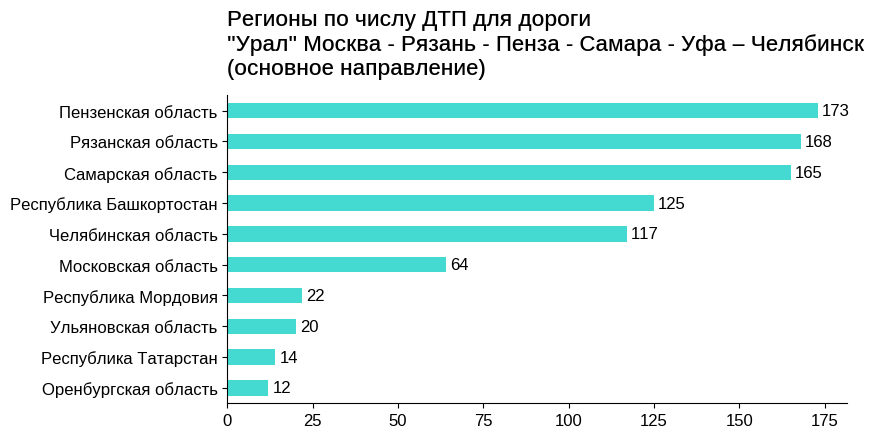

In [90]:
#3 Определите регион с самым опасным участком дороги для найденной дороги, постройте столбчатую диаграмму по числу ДТП.
ax = data[data['road_name']== '"Урал" Москва - Рязань - Пенза - Самара - Уфа – Челябинск (основное направление)']['region_name']\
.value_counts().sort_values(ascending=True)\
.plot(kind='barh',
      figsize=(8, 4)
      )

plt.ylabel(None)
plt.title('Регионы по числу ДТП для дороги\n"Урал" Москва - Рязань - Пенза - Самара - Уфа – Челябинск\n(основное направление)')
ax.bar_label(ax.containers[0], padding=padding, fontsize=12)
plt.show()

### Дополнительное задание 3
1. Для топ-10 дорог пересекающих разные регионы определите суммарное число погибших, участников ДТП (participants_amount).
2. Постройте столбчатую диаграмму числа ДТП  для определенных в п.1 дорог по регионам. (визуализируйте только топ-10 регионов по числу ДТП)
3. Для каждой дороги из п.1 постойте столбчатую диаграмму распределения числа ДТП по регионам. Реализуйте в цикле.

In [92]:
#1 Для топ-10 дорог пересекающих разные регионы определите суммарное число погибших, участников ДТП (participants_amount).
top_road = df2[df2['road_name'] != 'отсутствует']['road_name'].value_counts().head(10).index
report_8_1 = data.query('road_name in @top_road').groupby('road_name')[['fatalities_amount', 'participants_amount']].sum().reset_index()
report_8_1

,road_name,fatalities_amount,participants_amount
0,"""Волга"" Москва - Владимир - Нижний Новгород - ...",1324,3443
1,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",1243,3041
2,"""Кавказ"" автомобильная дорога М-4 ""Дон"" - Влад...",1244,3083
3,"""Крым"" Москва - Тула - Орел - Курск - Белгород...",672,1642
4,"""Россия"" Москва - Тверь - Великий Новгород - С...",572,1705
5,"""Украина"" Москва - Калуга - Брянск - граница с...",383,1019
6,"""Урал"" Москва - Рязань - Пенза - Самара - Уфа ...",1389,3400
7,"""Холмогоры"" Москва - Ярославль - Вологда – Арх...",582,1555
8,"«Каспий» автомобильная дорога М-4 ""Дон"" - Тамб...",615,1467
9,"Платные участки от Москвы через Воронеж, Росто...",353,880


In [93]:
report_8_1.merge(data2[['road_name', 'road_code']], how='left', on='road_name').drop_duplicates().reset_index(drop=True)

,road_name,fatalities_amount,participants_amount,road_code
0,"""Волга"" Москва - Владимир - Нижний Новгород - ...",1324,3443,М-7
1,"""Дон"" Москва - Воронеж - Ростов-на-Дону - Крас...",1243,3041,М-4
2,"""Кавказ"" автомобильная дорога М-4 ""Дон"" - Влад...",1244,3083,Р-217
3,"""Крым"" Москва - Тула - Орел - Курск - Белгород...",672,1642,М-2
4,"""Россия"" Москва - Тверь - Великий Новгород - С...",572,1705,М-10
5,"""Украина"" Москва - Калуга - Брянск - граница с...",383,1019,М-3
6,"""Урал"" Москва - Рязань - Пенза - Самара - Уфа ...",1389,3400,М-5
7,"""Холмогоры"" Москва - Ярославль - Вологда – Арх...",582,1555,М-8
8,"«Каспий» автомобильная дорога М-4 ""Дон"" - Тамб...",615,1467,Р-22
9,"Платные участки от Москвы через Воронеж, Росто...",353,880,М-4


In [94]:
road_region_crash = df2.query('road_name in @top_road').reset_index(drop=True)

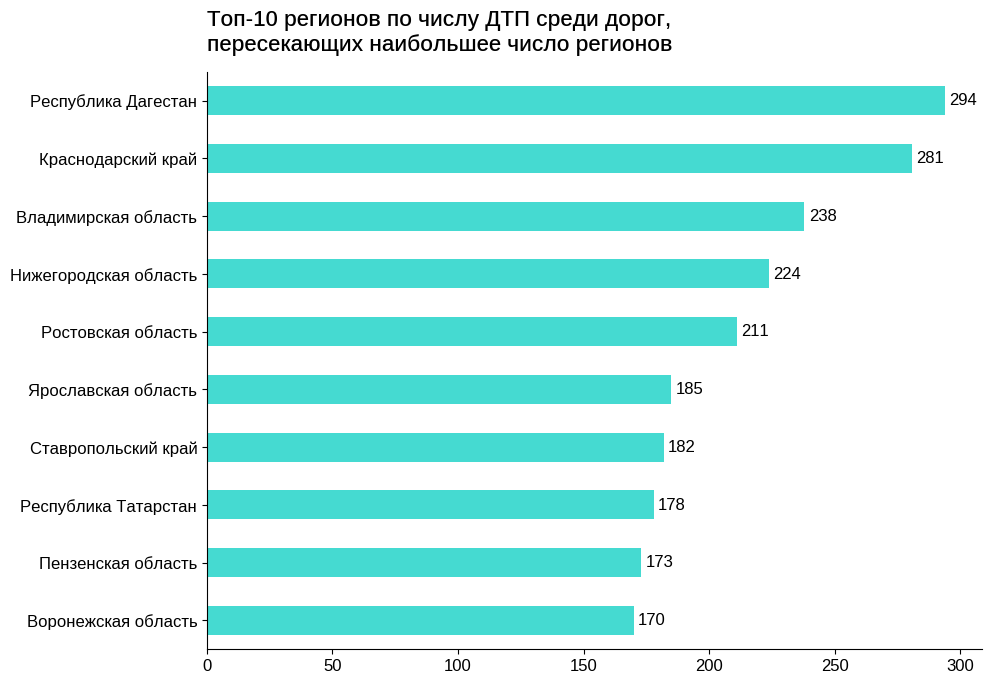

In [95]:
# 2 Постройте столбчатую диаграмму числа ДТП для определенных в п.1 дорог по регионам. (визуализируйте только топ-10 регионов по числу ДТП)
top_region = road_region_crash.sort_values('reg_code').tail(10)
ax = top_region.plot(kind='barh',
                title='Топ-10 регионов по числу ДТП среди дорог,\nпересекающих наибольшее число регионов',
                x='region_name',
                y='reg_code',
                legend=False
               )
plt.ylabel(None)
ax.bar_label(ax.containers[0], padding=padding, fontsize=12)
plt.show()

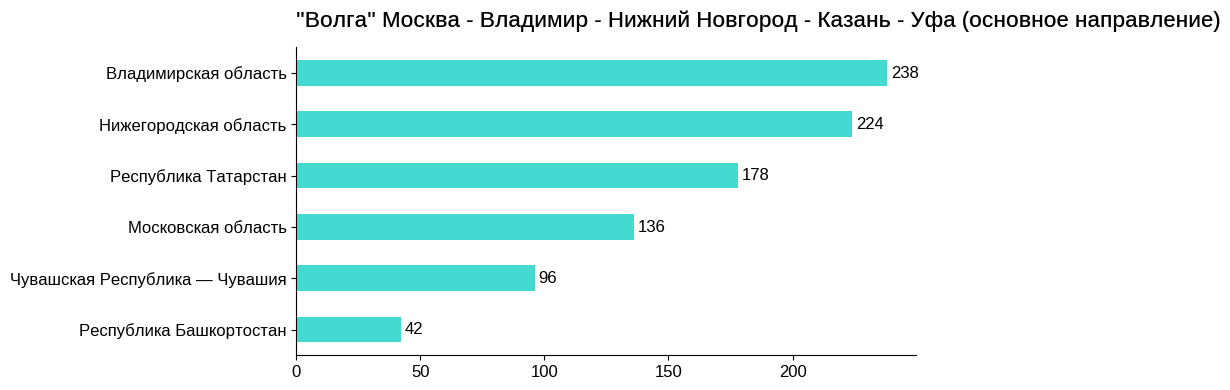

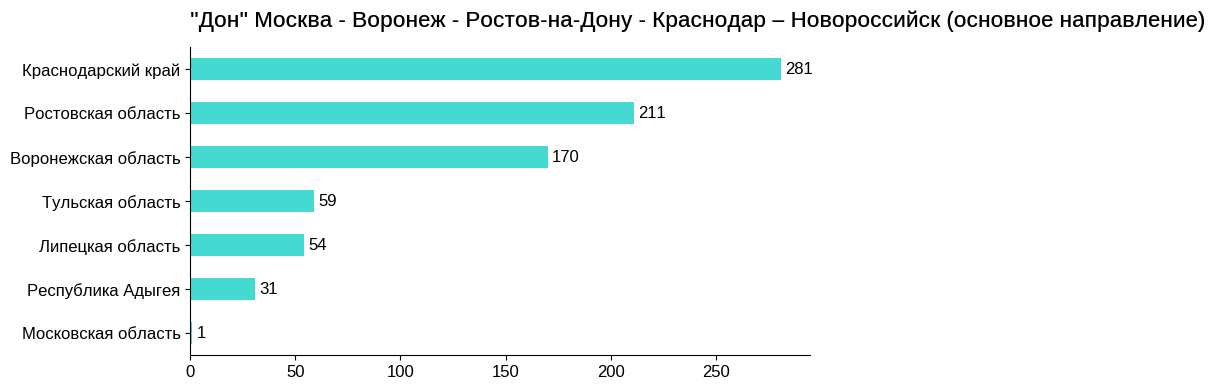

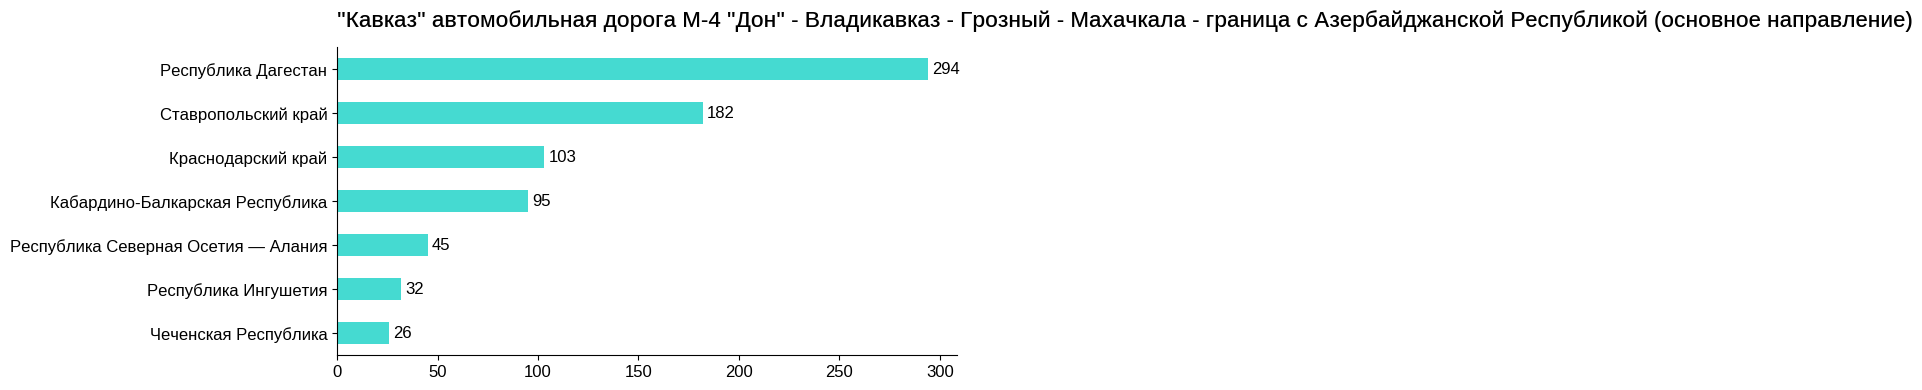

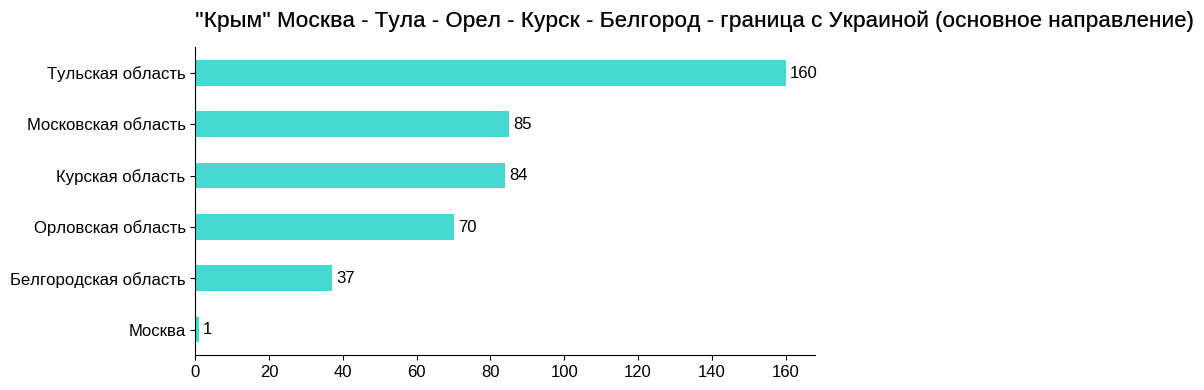

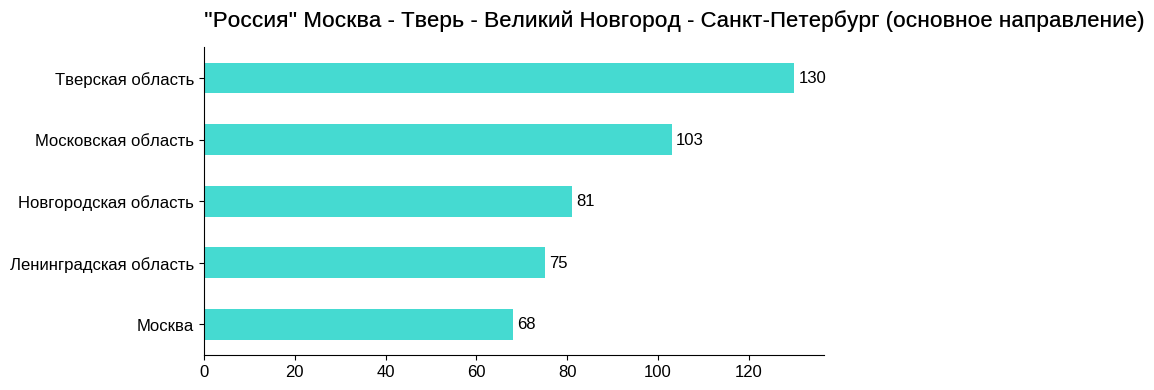

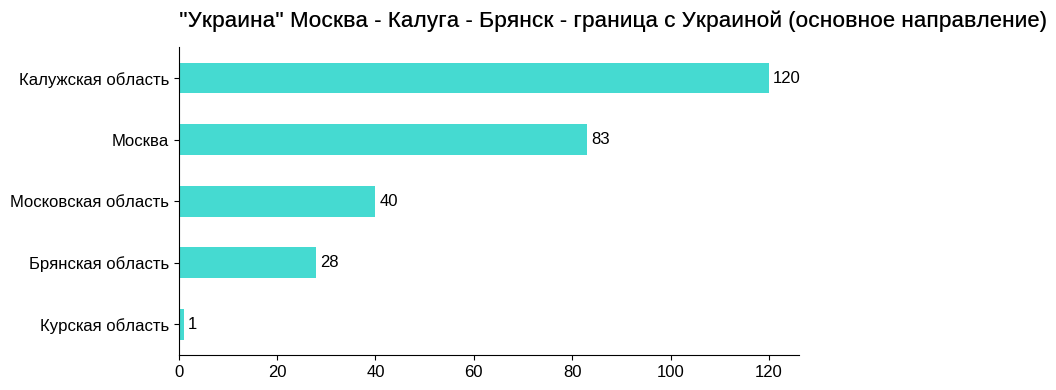

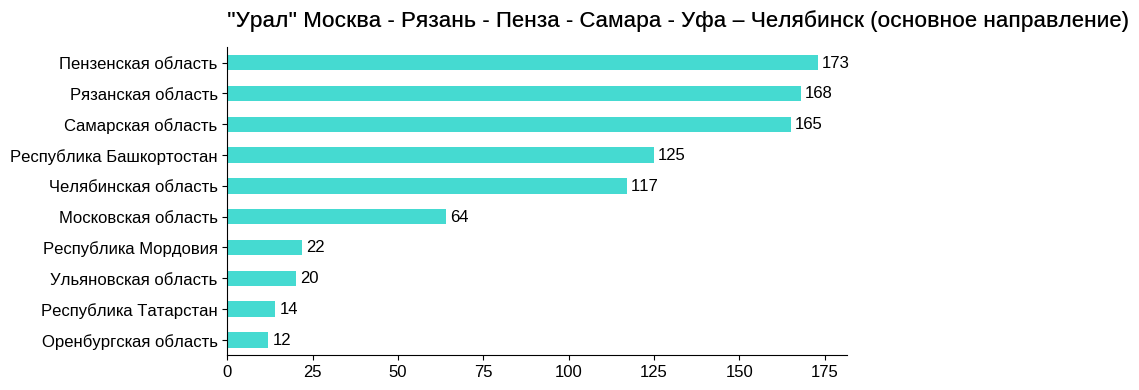

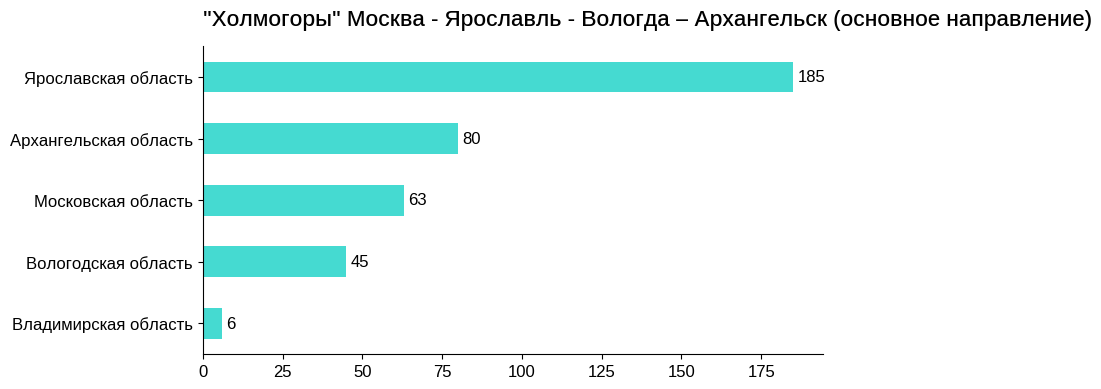

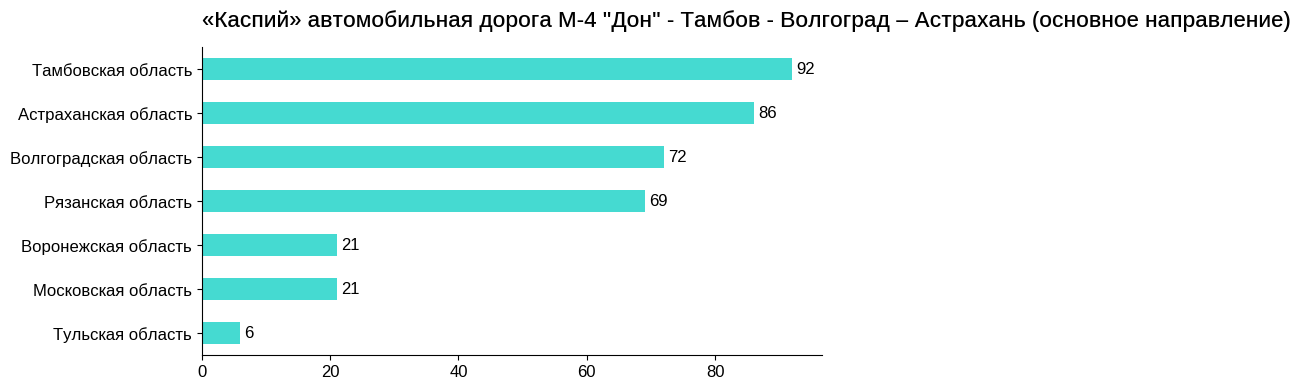

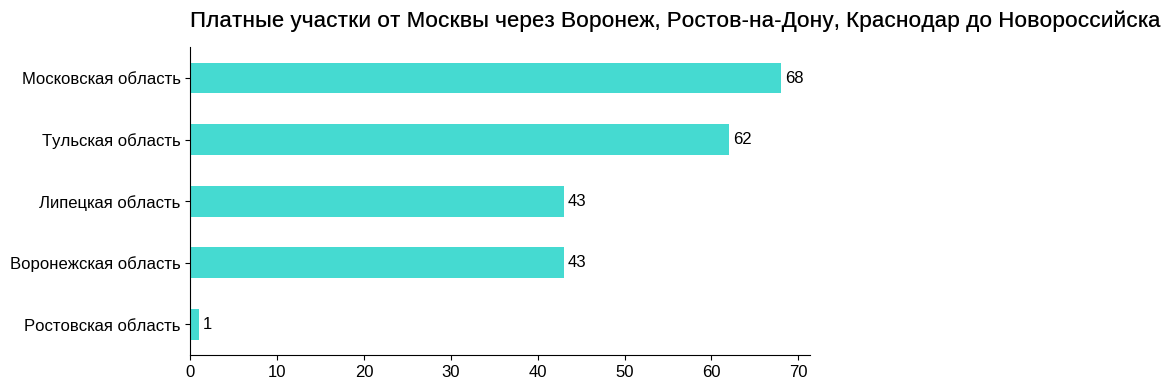

In [96]:
#3 Для каждой дороги из п.1 постойте столбчатую диаграмму распределения числа ДТП по регионам. Реализуйте в цикле.
for road in road_region_crash['road_name'].unique():
    ax = road_region_crash.query('road_name == @road').sort_values('reg_code').head(10)\
    .plot(kind='barh',
          figsize=(8, 4),
          title=road,
          x='region_name',
          y='reg_code',
          legend=False)
    plt.ylabel(None)
    ax.bar_label(ax.containers[0], padding=padding, fontsize=12)

### Отчет об анализе

<b>Задача</b><br>
Для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети необходимо исследовать и подготовить данные по вопросам:
1. Найти регионы с наибольшей аварийностью.
2. Определить распределение числа ДТП по типам дорог, по видам ДТП.
3. Исследовать зависимость числа ДТП от дня недели.
4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.
5. Исследовать время ожидания сотрудников ДПС.
6. Исследовать число участников ДТП.
7. Исследовать ДТП в ночное время суток.
8. Определить наиболее опасные дороги.


<b> Выводы:
1. С наибольшой аварийностью (по числу ДТП) по удельному весу преобладают следующие регионы: Московская область 7.07%, Краснодарский край 5.87%, Ленинградская область 3.65%, Республика Башкортостан 2.75%, Ставропольский край 2.45%, Ростовская область 2.43%, Москва 2.39%, Республика Татарстан 2.24%, Владимирская область 2.15%, Красноярский край 2.05%
2. Распределение числа ДТП по типам дорог: Региональная или межмунициальная дорога общего пользования 22249 случаев ДТП, Федеральная дорога общего пользования 16644 случаев ДТП; Распределение числа ДТП по видам ДТП: Распределение числа ДТП на наиболее популярным видам ДТП: Столкновение - 18850, Опрокидывание - 6423, Наезд на пешехода - 4754, Наезд на препятствие - 3102, Съезд с дороги - 2752
3. Наибольшее число ДТП приходится на субботу - 6602. Наименьшее в среду - 4886. Общая динамика: в будние дни (кроме пятницы) число ДТП значительно ниже, в пятницу начинается рост, в выходные достигает пика, далее идет на спад
4. Сравнение идет по средним абсолютным значениям признака, в целях сравнения данные не округляются до целых
- Топ-5 регионов по числу погибших в ДТП: Республика Ингушетия - 1.9878, Республика Тыва - 1.94231, Республика Калмыкия - 1.86782 ,Республика Дагестан - 1.83704, Волгоградская область - 1.79842
- Топ-5 регионов по числу участников в ДТП: Магаданская область - 5.45122, Псковская область - 5.42814, Костромская область - 5.3961 ,Республика Алтай - 5.38462, Мурманская область - 5.21705
- Топ-5 регионов по числу задействованных транспортных средств в ДТП: Санкт-Петербург - 2.35795, Москва - 2.21222, Волгоградская область - 2.17391, Новосибирская область - 2.02428, Воронежская область - 1.97581
- Топ-5 регионов по числу пострадавших в ДТП: Чеченская Республика - 0.484536, Кабардино-Балкарская Республика - 0.406504, Республика Ингушетия - 0.353659, Ульяновская область - 0.343972, Ростовская область - 0.322785
5. В данных найдены выбросы, около 500, 600 минут, а также 800 (время ожидания сотрудников). Исключая их, получены следующие результаты: в среднем время ожидания сотрудников составляет 120 минут, самое короткое время ожидания составляет 39 минут, а длинное 202 минуты. Также выделены регионы, у которых средене значение время ожидания отклоняется сильнее всего: Республика Марий Эл - 3.6679, Республика Тыва - 3.5689, Курганская область - 3.48959, Калининградская область - 3.36028, Ярославская область - 3.18488, Ульяновская область - 2.99482, Архангельская область - 2.98615, Алтайский край - 2.90055, Санкт-Петербург - 2.85403, Пермский край - 2.84896
6. Наиболее частые ситуации ДТП проходят с 2 участниками, в общем случае в ДТП привлекают не более 7 человек, однако существует отдельная ситуация, когда требуется 12 участников: в ней как правило один погибший, один пострадавший и одно задейстованное транспортное средство
7. Процент ДТП в ночные сутки (от 0 до 5 часов включительно) составляет 12.3% от всех случаев ДТП. Большая часть этих случае приходится ближе к 12 часам ночи, к утру число ДТП снижается и достагает глобального минимума. Большая часть ДТП приходится на середину дня (15 часов)
8. Самые опасные дороги по числу погибших федерального уровня - 'М-5', 'М-4', 'Р-217', 'М-7', 'А-151', 'Р-22', 'М-9', 'А-181', 'Р-158', 'Р-208', 'М-2'. Регионального/муниципльного уровня - '58К-517', '71А-1109', '11А-004', '35А-001'. На дорога обоих типов насчитывается максимальное число погибших в ДТП - 10 человек. Для дорог, пересекающих набольшее число регионов следует провести доп. исследование, чтобы понять, можно ли их считать опасными

<b>Дополнительное исследование<b>

In [97]:
top_road

Index(['"Урал" Москва - Рязань - Пенза - Самара - Уфа – Челябинск (основное направление)',
       '"Кавказ" автомобильная дорога М-4 "Дон" - Владикавказ - Грозный - Махачкала - граница с Азербайджанской Республикой (основное направление)',
       '«Каспий» автомобильная дорога М-4 "Дон" - Тамбов - Волгоград – Астрахань (основное направление)',
       '"Дон" Москва - Воронеж - Ростов-на-Дону - Краснодар – Новороссийск (основное направление)',
       '"Крым" Москва - Тула - Орел - Курск - Белгород - граница с Украиной (основное направление)',
       '"Волга" Москва - Владимир - Нижний Новгород - Казань - Уфа (основное направление)',
       '"Украина" Москва - Калуга - Брянск - граница с Украиной (основное направление)',
       '"Холмогоры" Москва - Ярославль - Вологда – Архангельск (основное направление)',
       '"Россия" Москва - Тверь - Великий Новгород - Санкт-Петербург (основное направление)',
       'Платные участки от Москвы через Воронеж, Ростов-на-Дону, Краснодар до Новороссийск

In [98]:
lst = ['М-5', 'М-4', 'Р-217', 'М-7', 'А-151', 'Р-22', 'М-9', 'А-181', 'Р-158', 'Р-208', 'М-2', '58К-517', '71А-1109', '11А-004', '35А-001']

In [99]:
# Проверим, сколько дорог, пересекающих наибольшее число регионов, входят в число самых опасных. Для этого сформируем список названий опасных дорог
data.query('road_code.isin(@lst)')['road_name'].unique();

In [100]:
len(top_road)

10

In [101]:
# Сравним
finded_road = []
for road in data.query('road_code.isin(@lst)')['road_name'].unique():
    if road in top_road:
        print(road)
        finded_road.append(road)

"Кавказ" автомобильная дорога М-4 "Дон" - Владикавказ - Грозный - Махачкала - граница с Азербайджанской Республикой (основное направление)
"Волга" Москва - Владимир - Нижний Новгород - Казань - Уфа (основное направление)
"Дон" Москва - Воронеж - Ростов-на-Дону - Краснодар – Новороссийск (основное направление)
«Каспий» автомобильная дорога М-4 "Дон" - Тамбов - Волгоград – Астрахань (основное направление)
"Крым" Москва - Тула - Орел - Курск - Белгород - граница с Украиной (основное направление)
"Урал" Москва - Рязань - Пенза - Самара - Уфа – Челябинск (основное направление)
Платные участки от Москвы через Воронеж, Ростов-на-Дону, Краснодар до Новороссийска


In [102]:
set(top_road) - set(finded_road)

{'"Россия" Москва - Тверь - Великий Новгород - Санкт-Петербург (основное направление)',
 '"Украина" Москва - Калуга - Брянск - граница с Украиной (основное направление)',
 '"Холмогоры" Москва - Ярославль - Вологда – Архангельск (основное направление)'}

In [103]:
# Тогда данные дороги могут тоже относится к опасным
data[data['road_name'].isin(set(top_road) - set(finded_road))][['road_name', 'road_code']].drop_duplicates()

,road_name,road_code
82,"""Россия"" Москва - Тверь - Великий Новгород - С...",М-10
84,"""Холмогоры"" Москва - Ярославль - Вологда – Арх...",М-8
376,"""Украина"" Москва - Калуга - Брянск - граница с...",М-3
